In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.BRENT)

In [14]:
dataset.shape

(757, 81)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
755,2025-06-24,CO,-432876.0,1189626.0,1622502.0,-6746.0,498013.0,504759.0,39743.0,-73318.0,...,-53127.0,-1301754.0,-766204.0,-726115.0,-9.31,0.94,-8.73,0.94,-8.32,0.85
756,2025-07-01,CO,-427357.0,1092550.0,1519907.0,-8225.0,475395.0,483620.0,5519.0,39743.0,...,-1301754.0,NaN,-726115.0,NaN,0.94,NaN,0.94,NaN,0.85,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [17]:
dataset['Commercial_NetPosition'].describe()

count       757.000000
mean    -406194.019815
std      202484.353988
min     -949089.000000
25%     -561322.000000
50%     -353317.000000
75%     -260809.000000
max      -16110.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count       757.000000
mean      91411.809775
std      132752.740601
min     -294812.000000
25%        7527.000000
50%       75283.000000
75%      151150.000000
max      508872.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

np.int64(178)

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [23]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [24]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [25]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [26]:
response_names =  ['forward_ManagedMoney_NetPosition_to_openinterest_change',
                    'forward_ManagedMoney_LongPosition_to_openinterest_change',
                    'forward_ManagedMoney_ShortPosition_to_openinterest_change'] 



In [27]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [28]:
import json

In [29]:
with open("br_cot_mm_forecast_selected_features_by_response.json", "r") as f:
    selected_features_by_response = json.load(f)

In [30]:
selected_features_by_response

{'forward_report_ManagedMoney_NetPosition_change': ['prior_report_SyntheticF1MinusF2_RolledPrice_change',
  'prior_cumulative_5D_F2_Volume_change',
  'prior_5D_F2_OI_change',
  'prior_5D_AGG_OI_change',
  'F1_RolledPrice_change'],
 'forward_report_ManagedMoney_LongPosition_change': ['prior_report_ManagedMoney_NetPosition_change',
  'prior_report_ManagedMoney_NetPosition_to_openinterest_change',
  'F2_RolledPrice_change'],
 'forward_report_ManagedMoney_ShortPosition_change': ['F2_RolledPrice_change',
  'prior_report_ManagedMoney_ShortPosition_change',
  'prior_report_SyntheticF1MinusF2_RolledPrice_change',
  'prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_5D_F2_OI_change'],
 'forward_ManagedMoney_NetPosition_to_openinterest_change': ['F3_RolledPrice_rolling_20D_volatility',
  'F3_RolledPrice_change'],
 'forward_ManagedMoney_LongPosition_to_openinterest_change': ['F2_RolledPrice_change',
  'prior_report_ManagedMoney_ShortPosition_change',
  'prior_report_ManagedMoney_ShortPositio

In [31]:
from src.preprocessing.base import Winsorizer

In [32]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

estimators_  = {
    # Elastic-net via SGD (fast, online)
    "enet": SGDRegressor(
        penalty="elasticnet",
        alpha=1e-4,
        l1_ratio=0.15,
        loss="squared_error",   # or "huber" for robustness
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ),
    # Classic L1 / OLS / L2
    "lasso": Lasso(alpha=1.0, random_state=42),
    "ols": LinearRegression(),
    "ridge": Ridge(alpha=1.0, random_state=42),

    # Tree-based regressors
    "rf": RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42),
    "extra": ExtraTreesRegressor(n_estimators=250, max_depth=10, random_state=42),
    "hgbm": HistGradientBoostingRegressor(max_iter=150, learning_rate=0.001, random_state=42),
}


In [34]:
from __future__ import annotations
import numpy as np
import optuna
from optuna import pruners
from research.model_selection.evaluation import find_best_model

responses_best_model = {}
responses_best_params = {}
responses_study = {}
responses_best_per_model = {}

for (response_name, feature_names) in selected_features_by_response.items():
    best_model, best_params, study, best_per_model = find_best_model(
                        Xy=dataset,
                        feature_names=feature_names,
                        response_name=response_name,
                        cv=cv,
                        n_trials=80,         # bump this as you like
                        n_jobs_cpcv=10,
                        seed=42
                    )
    responses_best_model[response_name]=best_model
    responses_best_params[response_name]=best_params
    responses_study[response_name]=study
    responses_best_per_model[response_name]=best_per_model
    
    print("Overall Best Params:", best_params)
    print("\nBest Per Model:")
    for model, info in best_per_model.items():
        print(f"{model}: score={info['score']:.4f}, params={info['params']}")

[I 2025-08-20 18:56:47,349] A new study created in memory with name: no-name-1cb07a8b-716d-4cbc-b45c-1c605e343935
Best trial: 1. Best value: 0.135813:   1%|       | 1/80 [00:01<01:50,  1.40s/it]

[I 2025-08-20 18:56:48,761] Trial 0 finished with value: 0.13579748736681696 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.13579748736681696.
[I 2025-08-20 18:56:48,805] Trial 1 finished with value: 0.1358130485773004 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.1358130485773004.


Best trial: 2. Best value: 0.159607:   4%|▎      | 3/80 [00:05<02:17,  1.79s/it]

[I 2025-08-20 18:56:52,601] Trial 2 finished with value: 0.15960730388776756 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.15960730388776756.


Best trial: 2. Best value: 0.159607:   9%|▌      | 7/80 [00:05<00:39,  1.86it/s]

[I 2025-08-20 18:56:52,895] Trial 3 finished with value: 0.10062364039351723 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.15960730388776756.
[I 2025-08-20 18:56:52,937] Trial 4 finished with value: 0.13581524420966004 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.15960730388776756.
[I 2025-08-20 18:56:52,979] Trial 5 finished with value: 0.13581304652577245 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.15960730388776756.
[I 2025-08-20 18:56:53,024] Trial 6 finished with value: -0.02663640958206005 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.15960730388776756.
[I 2025-08-20 18:56:53,064] Trial 7 finished with value: 0.13581304652577245

Best trial: 2. Best value: 0.159607:  11%|▊      | 9/80 [00:06<00:28,  2.47it/s]

[I 2025-08-20 18:56:53,372] Trial 8 finished with value: 0.1348069838965393 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.15960730388776756.
[I 2025-08-20 18:56:53,403] Trial 9 finished with value: 0.13581304652577245 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.15960730388776756.


Best trial: 2. Best value: 0.159607:  14%|▊     | 11/80 [00:09<01:05,  1.06it/s]

[I 2025-08-20 18:56:57,346] Trial 10 finished with value: 0.15952423637102964 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.15960730388776756.


Best trial: 2. Best value: 0.159607:  15%|▉     | 12/80 [00:13<01:40,  1.47s/it]

[I 2025-08-20 18:57:00,983] Trial 11 finished with value: 0.1595242363710296 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.15960730388776756.


Best trial: 2. Best value: 0.159607:  16%|▉     | 13/80 [00:17<02:11,  1.96s/it]

[I 2025-08-20 18:57:04,689] Trial 12 finished with value: 0.15952423637102964 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.15960730388776756.


Best trial: 13. Best value: 0.159682:  18%|▉    | 14/80 [00:19<02:07,  1.93s/it]

[I 2025-08-20 18:57:06,503] Trial 13 finished with value: 0.15968169213399305 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.15968169213399305.


Best trial: 14. Best value: 0.162415:  19%|▉    | 15/80 [00:22<02:36,  2.41s/it]

[I 2025-08-20 18:57:10,321] Trial 14 finished with value: 0.16241542529375877 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  20%|█    | 16/80 [00:27<03:02,  2.85s/it]

[I 2025-08-20 18:57:14,397] Trial 15 finished with value: 0.1521440560614931 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  21%|█    | 17/80 [00:30<03:17,  3.14s/it]

[I 2025-08-20 18:57:18,298] Trial 16 finished with value: 0.16204331821703236 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  22%|█▏   | 18/80 [00:34<03:28,  3.36s/it]

[I 2025-08-20 18:57:22,214] Trial 17 finished with value: 0.15360364762359344 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  24%|█▏   | 19/80 [00:37<03:17,  3.24s/it]

[I 2025-08-20 18:57:25,157] Trial 18 finished with value: 0.16174623009740646 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  25%|█▎   | 20/80 [00:38<02:32,  2.54s/it]

[I 2025-08-20 18:57:25,980] Trial 19 finished with value: 0.14105923502744377 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.
[I 2025-08-20 18:57:26,023] Trial 20 finished with value: 0.1358130464187357 and parameters: {'model': 'lasso', 'alpha': 8.357633562224205e-06}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  28%|█▍   | 22/80 [00:41<02:01,  2.10s/it]

[I 2025-08-20 18:57:29,112] Trial 21 finished with value: 0.1617462300974065 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  29%|█▍   | 23/80 [00:44<02:12,  2.32s/it]

[I 2025-08-20 18:57:32,122] Trial 22 finished with value: 0.1618361882606304 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  30%|█▌   | 24/80 [00:47<02:22,  2.54s/it]

[I 2025-08-20 18:57:35,283] Trial 23 finished with value: 0.16103615963859055 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.
[I 2025-08-20 18:57:35,329] Trial 24 finished with value: 0.13497112908255532 and parameters: {'model': 'enet', 'alpha': 2.269322193554023e-06, 'l1_ratio': 0.9024426661978924, 'loss': 'squared_error'}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  32%|█▋   | 26/80 [00:51<01:58,  2.20s/it]

[I 2025-08-20 18:57:38,772] Trial 25 finished with value: 0.15969968684287583 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  34%|█▋   | 27/80 [00:54<02:05,  2.37s/it]

[I 2025-08-20 18:57:41,712] Trial 26 finished with value: 0.158513092419902 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  35%|█▊   | 28/80 [00:58<02:24,  2.77s/it]

[I 2025-08-20 18:57:45,676] Trial 27 finished with value: 0.16231661666052383 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  38%|█▉   | 30/80 [01:04<02:57,  3.54s/it]

[I 2025-08-20 18:57:51,391] Trial 28 finished with value: 0.12497078481223364 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 26, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.
[I 2025-08-20 18:57:51,434] Trial 29 finished with value: 0.13568328555073914 and parameters: {'model': 'lasso', 'alpha': 9.409741456225913}. Best is trial 14 with value: 0.16241542529375877.
[I 2025-08-20 18:57:51,470] Trial 30 finished with value: 0.07597634367233119 and parameters: {'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  40%|██   | 32/80 [01:08<01:53,  2.36s/it]

[I 2025-08-20 18:57:55,334] Trial 31 finished with value: 0.16220136175845942 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 27, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.
[I 2025-08-20 18:57:55,366] Trial 32 finished with value: 0.1431828677117212 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  42%|██▏  | 34/80 [01:11<01:42,  2.23s/it]

[I 2025-08-20 18:57:59,277] Trial 33 finished with value: 0.16221164249768924 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 26, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  44%|██▏  | 35/80 [01:13<01:31,  2.03s/it]

[I 2025-08-20 18:58:00,445] Trial 34 finished with value: 0.15387952054209375 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  46%|██▎  | 37/80 [01:16<01:43,  2.41s/it]

[I 2025-08-20 18:58:04,251] Trial 35 finished with value: 0.16220136175845942 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 27, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.
[I 2025-08-20 18:58:04,284] Trial 36 finished with value: 0.1436315793923532 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 14 with value: 0.16241542529375877.
[I 2025-08-20 18:58:04,316] Trial 37 finished with value: 0.1358130254028843 and parameters: {'model': 'lasso', 'alpha': 0.0016913648093404418}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  49%|██▍  | 39/80 [01:19<01:09,  1.70s/it]

[I 2025-08-20 18:58:07,047] Trial 38 finished with value: 0.15229461075074693 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 30, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  50%|██▌  | 40/80 [01:22<01:12,  1.82s/it]

[I 2025-08-20 18:58:09,381] Trial 39 finished with value: 0.15329495079302652 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 7, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 14 with value: 0.16241542529375877.
[I 2025-08-20 18:58:09,422] Trial 40 finished with value: 0.13581304652577245 and parameters: {'model': 'ols'}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  52%|██▋  | 42/80 [01:25<01:11,  1.87s/it]

[I 2025-08-20 18:58:13,321] Trial 41 finished with value: 0.16221164249768924 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 26, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  54%|██▋  | 43/80 [01:29<01:23,  2.27s/it]

[I 2025-08-20 18:58:17,187] Trial 42 finished with value: 0.16231661666052385 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  55%|██▊  | 44/80 [01:33<01:31,  2.54s/it]

[I 2025-08-20 18:58:20,686] Trial 43 finished with value: 0.16124323057534184 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  56%|██▊  | 45/80 [01:36<01:32,  2.65s/it]

[I 2025-08-20 18:58:23,667] Trial 44 finished with value: 0.16178166950695483 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 14. Best value: 0.162415:  57%|██▉  | 46/80 [01:40<01:45,  3.11s/it]

[I 2025-08-20 18:58:28,120] Trial 45 finished with value: 0.151643161724423 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16241542529375877.


Best trial: 46. Best value: 0.164627:  59%|██▉  | 47/80 [01:45<01:57,  3.55s/it]

[I 2025-08-20 18:58:32,898] Trial 46 finished with value: 0.16462667529906952 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  60%|███  | 48/80 [01:50<02:09,  4.06s/it]

[I 2025-08-20 18:58:38,287] Trial 47 finished with value: 0.15642661910608507 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  61%|███  | 49/80 [01:52<01:41,  3.28s/it]

[I 2025-08-20 18:58:39,580] Trial 48 finished with value: 0.159869356397934 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  62%|███▏ | 50/80 [01:57<01:53,  3.78s/it]

[I 2025-08-20 18:58:44,605] Trial 49 finished with value: 0.14904722435062834 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 46 with value: 0.16462667529906952.
[I 2025-08-20 18:58:44,637] Trial 50 finished with value: 0.13581304652577245 and parameters: {'model': 'ols'}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  65%|███▎ | 52/80 [02:00<01:15,  2.69s/it]

[I 2025-08-20 18:58:47,326] Trial 51 finished with value: 0.14044737964518766 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 46 with value: 0.16462667529906952.
[I 2025-08-20 18:58:47,368] Trial 52 finished with value: 0.13631245662928768 and parameters: {'model': 'ridge', 'alpha': 11.388871190716603}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  68%|███▍ | 54/80 [02:03<00:59,  2.28s/it]

[I 2025-08-20 18:58:50,600] Trial 53 finished with value: 0.15961967637662164 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 46 with value: 0.16462667529906952.
[I 2025-08-20 18:58:50,648] Trial 54 finished with value: 0.13497112476614853 and parameters: {'model': 'enet', 'alpha': 1.0114046829016986e-06, 'l1_ratio': 0.9527102811372881, 'loss': 'squared_error'}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  70%|███▌ | 56/80 [02:06<00:48,  2.02s/it]

[I 2025-08-20 18:58:53,738] Trial 55 finished with value: 0.16141824232201335 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 26, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  71%|███▌ | 57/80 [02:07<00:43,  1.90s/it]

[I 2025-08-20 18:58:55,174] Trial 56 finished with value: 0.057681177084436895 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 10, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  72%|███▋ | 58/80 [02:11<00:50,  2.29s/it]

[I 2025-08-20 18:58:58,806] Trial 57 finished with value: 0.1621398157663191 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  74%|███▋ | 59/80 [02:14<00:51,  2.46s/it]

[I 2025-08-20 18:59:01,766] Trial 58 finished with value: 0.1402779215583061 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  75%|███▊ | 60/80 [02:18<00:55,  2.78s/it]

[I 2025-08-20 18:59:05,486] Trial 59 finished with value: 0.16222076727300835 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 46 with value: 0.16462667529906952.
[I 2025-08-20 18:59:05,529] Trial 60 finished with value: 0.13581304511912204 and parameters: {'model': 'lasso', 'alpha': 0.00011011885825671409}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  78%|███▉ | 62/80 [02:21<00:43,  2.42s/it]

[I 2025-08-20 18:59:09,333] Trial 61 finished with value: 0.16241542529375877 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  79%|███▉ | 63/80 [02:25<00:46,  2.71s/it]

[I 2025-08-20 18:59:12,992] Trial 62 finished with value: 0.16212829461861647 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  80%|████ | 64/80 [02:29<00:48,  3.03s/it]

[I 2025-08-20 18:59:16,982] Trial 63 finished with value: 0.15138058160864898 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  81%|████ | 65/80 [02:32<00:45,  3.05s/it]

[I 2025-08-20 18:59:20,110] Trial 64 finished with value: 0.16173957960775462 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  82%|████▏| 66/80 [02:36<00:44,  3.15s/it]

[I 2025-08-20 18:59:23,523] Trial 65 finished with value: 0.15962752124432147 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  85%|████▎| 68/80 [02:40<00:42,  3.58s/it]

[I 2025-08-20 18:59:28,185] Trial 66 finished with value: 0.15188266355816038 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 46 with value: 0.16462667529906952.
[I 2025-08-20 18:59:28,217] Trial 67 finished with value: 0.13581304652577245 and parameters: {'model': 'ols'}. Best is trial 46 with value: 0.16462667529906952.
[I 2025-08-20 18:59:28,262] Trial 68 finished with value: 0.13497127160128347 and parameters: {'model': 'enet', 'alpha': 1.4829009136525857e-05, 'l1_ratio': 0.6000603695751017, 'loss': 'squared_error'}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  88%|████▍| 70/80 [02:44<00:23,  2.34s/it]

[I 2025-08-20 18:59:32,106] Trial 69 finished with value: 0.16174711358296118 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  89%|████▍| 71/80 [02:48<00:24,  2.69s/it]

[I 2025-08-20 18:59:36,142] Trial 70 finished with value: 0.13376181885335944 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  90%|████▌| 72/80 [02:52<00:23,  2.93s/it]

[I 2025-08-20 18:59:39,880] Trial 71 finished with value: 0.16231661666052385 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  91%|████▌| 73/80 [02:56<00:21,  3.09s/it]

[I 2025-08-20 18:59:43,465] Trial 72 finished with value: 0.16208186367213295 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  92%|████▋| 74/80 [02:59<00:19,  3.26s/it]

[I 2025-08-20 18:59:47,221] Trial 73 finished with value: 0.16210336981466916 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  94%|████▋| 75/80 [03:04<00:17,  3.53s/it]

[I 2025-08-20 18:59:51,473] Trial 74 finished with value: 0.15130713176440852 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 46 with value: 0.16462667529906952.
[I 2025-08-20 18:59:51,506] Trial 75 finished with value: 0.1358242640961585 and parameters: {'model': 'ridge', 'alpha': 0.24484442397601325}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  96%|████▊| 77/80 [03:07<00:07,  2.66s/it]

[I 2025-08-20 18:59:54,525] Trial 76 finished with value: 0.1618361882606304 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  98%|████▉| 78/80 [03:15<00:07,  3.92s/it]

[I 2025-08-20 19:00:02,486] Trial 77 finished with value: 0.14100930221155292 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627:  99%|████▉| 79/80 [03:16<00:03,  3.34s/it]

[I 2025-08-20 19:00:04,147] Trial 78 finished with value: 0.12025727600968579 and parameters: {'model': 'hgbm', 'learning_rate': 0.007408417108701418, 'max_depth': 10, 'max_iter': 500, 'l2_regularization': 0.0014350450428439743, 'max_leaf_nodes': 179}. Best is trial 46 with value: 0.16462667529906952.


Best trial: 46. Best value: 0.164627: 100%|█████| 80/80 [03:18<00:00,  2.48s/it]
[I 2025-08-20 19:00:05,395] A new study created in memory with name: no-name-48f55234-5410-4fef-a1e4-e62dd55c9059


[I 2025-08-20 19:00:05,389] Trial 79 finished with value: 0.15646665533053022 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 46 with value: 0.16462667529906952.
Overall Best Params: {'model': 'rf', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 10, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=0.1357, params={'model': 'lasso', 'alpha': 9.409741456225913}
ridge: score=0.1358, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.1403, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 2, 'max_features': 'log2'}
hgbm: score=0.0577, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 10, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
ols: score=0.1358, params={'model': 'ols'}
enet: score=-0.0266, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893,

Best trial: 1. Best value: 0.0835273:   1%|      | 1/80 [00:00<00:05, 13.35it/s]

[I 2025-08-20 19:00:05,436] Trial 0 finished with value: 0.08349443992472441 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.08349443992472441.
[I 2025-08-20 19:00:05,470] Trial 1 finished with value: 0.0835272534618548 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.0835272534618548.


Best trial: 2. Best value: 0.117037:   4%|▎      | 3/80 [00:03<01:21,  1.06s/it]

[I 2025-08-20 19:00:08,568] Trial 2 finished with value: 0.1170365054845291 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.1170365054845291.


Best trial: 2. Best value: 0.117037:   9%|▌      | 7/80 [00:03<00:25,  2.83it/s]

[I 2025-08-20 19:00:08,805] Trial 3 finished with value: 0.07906429982757747 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.1170365054845291.
[I 2025-08-20 19:00:08,838] Trial 4 finished with value: 0.08353579771804727 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.1170365054845291.
[I 2025-08-20 19:00:08,868] Trial 5 finished with value: 0.08352724542342928 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.1170365054845291.
[I 2025-08-20 19:00:08,911] Trial 6 finished with value: -0.07046653815107287 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.1170365054845291.
[I 2025-08-20 19:00:08,941] Trial 7 finished with value: 0.08352724542342928 and

Best trial: 2. Best value: 0.117037:  11%|▊      | 9/80 [00:03<00:19,  3.59it/s]

[I 2025-08-20 19:00:09,198] Trial 8 finished with value: 0.09424563188516039 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.1170365054845291.
[I 2025-08-20 19:00:09,228] Trial 9 finished with value: 0.08352724542342928 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.1170365054845291.


Best trial: 2. Best value: 0.117037:  14%|▊     | 11/80 [00:07<00:50,  1.37it/s]

[I 2025-08-20 19:00:12,440] Trial 10 finished with value: 0.1169889342274955 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.1170365054845291.


Best trial: 2. Best value: 0.117037:  15%|▉     | 12/80 [00:10<01:22,  1.21s/it]

[I 2025-08-20 19:00:15,644] Trial 11 finished with value: 0.1169889342274955 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.1170365054845291.


Best trial: 2. Best value: 0.117037:  16%|▉     | 13/80 [00:13<01:49,  1.64s/it]

[I 2025-08-20 19:00:18,824] Trial 12 finished with value: 0.11698893422749553 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.1170365054845291.


Best trial: 2. Best value: 0.117037:  18%|█     | 14/80 [00:14<01:46,  1.62s/it]

[I 2025-08-20 19:00:20,366] Trial 13 finished with value: 0.0847827558974052 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.1170365054845291.


Best trial: 14. Best value: 0.118546:  19%|▉    | 15/80 [00:21<02:58,  2.75s/it]

[I 2025-08-20 19:00:26,475] Trial 14 finished with value: 0.11854611965296738 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.11854611965296738.


Best trial: 15. Best value: 0.118551:  20%|█    | 16/80 [00:26<03:48,  3.57s/it]

[I 2025-08-20 19:00:32,306] Trial 15 finished with value: 0.11855064666828956 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.11855064666828956.


Best trial: 16. Best value: 0.118551:  24%|█▏   | 19/80 [00:32<02:25,  2.38s/it]

[I 2025-08-20 19:00:38,148] Trial 16 finished with value: 0.11855064666828959 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.11855064666828959.
[I 2025-08-20 19:00:38,241] Trial 17 finished with value: 0.08361769530863045 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 16 with value: 0.11855064666828959.
[I 2025-08-20 19:00:38,286] Trial 18 finished with value: 0.0832108384355358 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 16 with value: 0.11855064666828959.


Best trial: 16. Best value: 0.118551:  25%|█▎   | 20/80 [00:35<02:32,  2.55s/it]

[I 2025-08-20 19:00:41,362] Trial 19 finished with value: 0.11337903125954488 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.11855064666828959.


Best trial: 16. Best value: 0.118551:  26%|█▎   | 21/80 [00:41<03:12,  3.27s/it]

[I 2025-08-20 19:00:46,750] Trial 20 finished with value: 0.11805637106656944 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.11855064666828959.


Best trial: 16. Best value: 0.118551:  28%|█▍   | 22/80 [00:47<03:51,  3.99s/it]

[I 2025-08-20 19:00:52,735] Trial 21 finished with value: 0.1185459137548819 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.11855064666828959.


Best trial: 16. Best value: 0.118551:  29%|█▍   | 23/80 [00:52<04:10,  4.39s/it]

[I 2025-08-20 19:00:58,168] Trial 22 finished with value: 0.11805637106656944 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.11855064666828959.


Best trial: 23. Best value: 0.121383:  30%|█▌   | 24/80 [00:53<03:13,  3.46s/it]

[I 2025-08-20 19:00:59,271] Trial 23 finished with value: 0.12138344732510695 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  31%|█▌   | 25/80 [00:54<02:33,  2.78s/it]

[I 2025-08-20 19:01:00,376] Trial 24 finished with value: 0.1206867733247527 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  32%|█▋   | 26/80 [00:55<02:02,  2.27s/it]

[I 2025-08-20 19:01:01,381] Trial 25 finished with value: 0.10752442750727063 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  38%|█▉   | 30/80 [00:57<00:45,  1.11it/s]

[I 2025-08-20 19:01:02,725] Trial 26 finished with value: 0.10674566881193075 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.
[I 2025-08-20 19:01:02,760] Trial 27 finished with value: 0.05455018852375581 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 23 with value: 0.12138344732510695.
[I 2025-08-20 19:01:02,796] Trial 28 finished with value: 0.073828722139777 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 23 with value: 0.12138344732510695.
[I 2025-08-20 19:01:02,840] Trial 29 finished with value: 0.08352722512249346 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  39%|█▉   | 31/80 [00:58<00:45,  1.07it/s]

[I 2025-08-20 19:01:03,886] Trial 30 finished with value: 0.04166259504422784 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 15, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  40%|██   | 32/80 [01:03<01:30,  1.89s/it]

[I 2025-08-20 19:01:08,956] Trial 31 finished with value: 0.11693387863335455 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  41%|██   | 33/80 [01:04<01:20,  1.71s/it]

[I 2025-08-20 19:01:10,125] Trial 32 finished with value: 0.12073297616074598 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  42%|██▏  | 34/80 [01:05<01:12,  1.57s/it]

[I 2025-08-20 19:01:11,301] Trial 33 finished with value: 0.11590558717101081 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  44%|██▏  | 35/80 [01:09<01:30,  2.01s/it]

[I 2025-08-20 19:01:14,488] Trial 34 finished with value: 0.09759086049933063 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  46%|██▎  | 37/80 [01:11<01:26,  2.02s/it]

[I 2025-08-20 19:01:16,541] Trial 35 finished with value: 0.1190228064000476 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.
[I 2025-08-20 19:01:16,572] Trial 36 finished with value: 0.06586266920781264 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 23 with value: 0.12138344732510695.
[I 2025-08-20 19:01:16,615] Trial 37 finished with value: 0.08352724538838276 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  49%|██▍  | 39/80 [01:13<00:53,  1.31s/it]

[I 2025-08-20 19:01:18,714] Trial 38 finished with value: 0.11671876703763072 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  50%|██▌  | 40/80 [01:15<01:01,  1.53s/it]

[I 2025-08-20 19:01:21,090] Trial 39 finished with value: 0.10217778329227376 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 9, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 23 with value: 0.12138344732510695.
[I 2025-08-20 19:01:21,132] Trial 40 finished with value: 0.08352724542342928 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  52%|██▋  | 42/80 [01:17<00:51,  1.36s/it]

[I 2025-08-20 19:01:23,224] Trial 41 finished with value: 0.11918135002944844 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  54%|██▋  | 43/80 [01:19<00:56,  1.52s/it]

[I 2025-08-20 19:01:25,347] Trial 42 finished with value: 0.11918135002944845 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  55%|██▊  | 44/80 [01:21<00:51,  1.44s/it]

[I 2025-08-20 19:01:26,523] Trial 43 finished with value: 0.12074998208510447 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  56%|██▊  | 45/80 [01:22<00:47,  1.36s/it]

[I 2025-08-20 19:01:27,646] Trial 44 finished with value: 0.12075172907461498 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  59%|██▉  | 47/80 [01:23<00:44,  1.35s/it]

[I 2025-08-20 19:01:28,948] Trial 45 finished with value: 0.1189737028241036 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 21, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.12138344732510695.
[I 2025-08-20 19:01:28,979] Trial 46 finished with value: 0.08397998126302723 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 23 with value: 0.12138344732510695.
[I 2025-08-20 19:01:29,009] Trial 47 finished with value: 0.08352724542342928 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  61%|███  | 49/80 [01:24<00:25,  1.19it/s]

[I 2025-08-20 19:01:30,095] Trial 48 finished with value: 0.12075172907461498 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.
[I 2025-08-20 19:01:30,143] Trial 49 finished with value: 0.0836176921000676 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  64%|███▏ | 51/80 [01:25<00:21,  1.32it/s]

[I 2025-08-20 19:01:31,279] Trial 50 finished with value: 0.1189737028241036 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  65%|███▎ | 52/80 [01:27<00:23,  1.21it/s]

[I 2025-08-20 19:01:32,404] Trial 51 finished with value: 0.12075172907461501 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  66%|███▎ | 53/80 [01:28<00:24,  1.11it/s]

[I 2025-08-20 19:01:33,568] Trial 52 finished with value: 0.12075172907461498 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  68%|███▍ | 54/80 [01:29<00:24,  1.06it/s]

[I 2025-08-20 19:01:34,672] Trial 53 finished with value: 0.12005667115920506 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  69%|███▍ | 55/80 [01:30<00:24,  1.01it/s]

[I 2025-08-20 19:01:35,774] Trial 54 finished with value: 0.12075172907461498 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  70%|███▌ | 56/80 [01:32<00:31,  1.31s/it]

[I 2025-08-20 19:01:37,975] Trial 55 finished with value: 0.11788205756287241 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  71%|███▌ | 57/80 [01:33<00:25,  1.12s/it]

[I 2025-08-20 19:01:38,592] Trial 56 finished with value: 0.05433846690254644 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  72%|███▋ | 58/80 [01:34<00:25,  1.17s/it]

[I 2025-08-20 19:01:39,904] Trial 57 finished with value: 0.09714150976788147 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 15, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  74%|███▋ | 59/80 [01:35<00:24,  1.15s/it]

[I 2025-08-20 19:01:41,012] Trial 58 finished with value: 0.12137205860218485 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  75%|███▊ | 60/80 [01:37<00:29,  1.45s/it]

[I 2025-08-20 19:01:43,197] Trial 59 finished with value: 0.11934817794510912 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.
[I 2025-08-20 19:01:43,242] Trial 60 finished with value: 0.08352720505677819 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  78%|███▉ | 62/80 [01:39<00:19,  1.08s/it]

[I 2025-08-20 19:01:44,449] Trial 61 finished with value: 0.12075172907461501 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  79%|███▉ | 63/80 [01:40<00:18,  1.09s/it]

[I 2025-08-20 19:01:45,563] Trial 62 finished with value: 0.12005667115920506 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  80%|████ | 64/80 [01:41<00:17,  1.09s/it]

[I 2025-08-20 19:01:46,657] Trial 63 finished with value: 0.12137205860218488 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  81%|████ | 65/80 [01:42<00:16,  1.12s/it]

[I 2025-08-20 19:01:47,865] Trial 64 finished with value: 0.12137205860218485 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.
[I 2025-08-20 19:01:47,898] Trial 65 finished with value: 0.08361767250813801 and parameters: {'model': 'enet', 'alpha': 7.1036572377489855e-06, 'l1_ratio': 0.5857926674877615, 'loss': 'squared_error'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  84%|████▏| 67/80 [01:43<00:11,  1.15it/s]

[I 2025-08-20 19:01:48,963] Trial 66 finished with value: 0.12136699379217937 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  85%|████▎| 68/80 [01:47<00:19,  1.64s/it]

[I 2025-08-20 19:01:53,066] Trial 67 finished with value: 0.11878280504612364 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  86%|████▎| 69/80 [01:49<00:19,  1.74s/it]

[I 2025-08-20 19:01:55,097] Trial 68 finished with value: 0.11934881237086677 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  88%|████▍| 70/80 [01:50<00:14,  1.44s/it]

[I 2025-08-20 19:01:55,714] Trial 69 finished with value: 0.032699496472860176 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  89%|████▍| 71/80 [01:51<00:12,  1.35s/it]

[I 2025-08-20 19:01:56,829] Trial 70 finished with value: 0.12137205860218485 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  90%|████▌| 72/80 [01:52<00:10,  1.27s/it]

[I 2025-08-20 19:01:57,911] Trial 71 finished with value: 0.12137205860218485 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  91%|████▌| 73/80 [01:53<00:08,  1.25s/it]

[I 2025-08-20 19:01:59,084] Trial 72 finished with value: 0.12137205860218485 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.
[I 2025-08-20 19:01:59,115] Trial 73 finished with value: 0.08352724542342928 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  94%|████▋| 75/80 [01:54<00:04,  1.07it/s]

[I 2025-08-20 19:02:00,204] Trial 74 finished with value: 0.12136699379217937 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.
[I 2025-08-20 19:02:00,236] Trial 75 finished with value: 0.08356969097744135 and parameters: {'model': 'ridge', 'alpha': 0.24484442397601325}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  96%|████▊| 77/80 [01:55<00:02,  1.27it/s]

[I 2025-08-20 19:02:01,310] Trial 76 finished with value: 0.12137205860218485 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383:  98%|████▉| 78/80 [01:58<00:02,  1.07s/it]

[I 2025-08-20 19:02:03,409] Trial 77 finished with value: 0.11934817794510909 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.12138344732510695.


Best trial: 23. Best value: 0.121383: 100%|█████| 80/80 [01:59<00:00,  1.49s/it]
[I 2025-08-20 19:02:04,646] A new study created in memory with name: no-name-4762bb34-1602-44ba-933a-c175877c3ed9


[I 2025-08-20 19:02:04,595] Trial 78 finished with value: 0.12137205860218485 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.12138344732510695.
[I 2025-08-20 19:02:04,639] Trial 79 finished with value: 0.08352723480141086 and parameters: {'model': 'lasso', 'alpha': 0.0003820864791223947}. Best is trial 23 with value: 0.12138344732510695.
Overall Best Params: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}

Best Per Model:
lasso: score=0.0832, params={'model': 'lasso', 'alpha': 9.714586134002047}
ridge: score=0.0659, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.1067, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.0791, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.68

Best trial: 1. Best value: 0.0827702:   1%|      | 1/80 [00:00<00:04, 16.12it/s]

[I 2025-08-20 19:02:04,676] Trial 0 finished with value: 0.0827029407847285 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.0827029407847285.
[I 2025-08-20 19:02:04,708] Trial 1 finished with value: 0.08277024069949658 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.08277024069949658.


Best trial: 2. Best value: 0.132384:   4%|▎      | 3/80 [00:03<01:34,  1.22s/it]

[I 2025-08-20 19:02:08,315] Trial 2 finished with value: 0.13238356602660473 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.13238356602660473.


Best trial: 2. Best value: 0.132384:   9%|▌      | 7/80 [00:04<00:30,  2.39it/s]

[I 2025-08-20 19:02:08,688] Trial 3 finished with value: 0.08377867761775752 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.13238356602660473.
[I 2025-08-20 19:02:08,719] Trial 4 finished with value: 0.08276985870687266 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.13238356602660473.
[I 2025-08-20 19:02:08,752] Trial 5 finished with value: 0.0827702410563372 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.13238356602660473.
[I 2025-08-20 19:02:08,794] Trial 6 finished with value: -0.04840239248669045 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.13238356602660473.
[I 2025-08-20 19:02:08,827] Trial 7 finished with value: 0.0827702410563372 a

Best trial: 2. Best value: 0.132384:  11%|▊      | 9/80 [00:04<00:23,  3.08it/s]

[I 2025-08-20 19:02:09,105] Trial 8 finished with value: 0.12040474474228846 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.13238356602660473.
[I 2025-08-20 19:02:09,134] Trial 9 finished with value: 0.0827702410563372 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.13238356602660473.


Best trial: 2. Best value: 0.132384:  14%|▊     | 11/80 [00:08<00:57,  1.21it/s]

[I 2025-08-20 19:02:12,746] Trial 10 finished with value: 0.13229000072224398 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.13238356602660473.


Best trial: 2. Best value: 0.132384:  15%|▉     | 12/80 [00:11<01:33,  1.37s/it]

[I 2025-08-20 19:02:16,351] Trial 11 finished with value: 0.13229000072224398 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.13238356602660473.


Best trial: 2. Best value: 0.132384:  16%|▉     | 13/80 [00:15<02:05,  1.88s/it]

[I 2025-08-20 19:02:20,071] Trial 12 finished with value: 0.13229000072224398 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.13238356602660473.


Best trial: 2. Best value: 0.132384:  18%|█     | 14/80 [00:17<02:02,  1.86s/it]

[I 2025-08-20 19:02:21,854] Trial 13 finished with value: 0.10846533399220411 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.13238356602660473.


Best trial: 2. Best value: 0.132384:  19%|█▏    | 15/80 [00:24<03:25,  3.16s/it]

[I 2025-08-20 19:02:28,856] Trial 14 finished with value: 0.12905983975247706 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.13238356602660473.


Best trial: 2. Best value: 0.132384:  20%|█▏    | 16/80 [00:25<02:57,  2.78s/it]

[I 2025-08-20 19:02:30,582] Trial 15 finished with value: 0.12612516090349765 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 2 with value: 0.13238356602660473.


Best trial: 2. Best value: 0.132384:  22%|█▎    | 18/80 [00:32<03:52,  3.75s/it]

[I 2025-08-20 19:02:36,917] Trial 16 finished with value: 0.12874800878040363 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 2 with value: 0.13238356602660473.
[I 2025-08-20 19:02:36,964] Trial 17 finished with value: 0.08264609479504002 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 2 with value: 0.13238356602660473.
[I 2025-08-20 19:02:37,008] Trial 18 finished with value: 0.08219966126011234 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 2 with value: 0.13238356602660473.


Best trial: 2. Best value: 0.132384:  25%|█▌    | 20/80 [00:33<01:51,  1.86s/it]

[I 2025-08-20 19:02:37,664] Trial 19 finished with value: 0.10085607725659916 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.13238356602660473.


Best trial: 2. Best value: 0.132384:  26%|█▌    | 21/80 [00:35<01:58,  2.00s/it]

[I 2025-08-20 19:02:40,213] Trial 20 finished with value: 0.12964142295362646 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.13238356602660473.


Best trial: 2. Best value: 0.132384:  28%|█▋    | 22/80 [00:40<02:31,  2.61s/it]

[I 2025-08-20 19:02:44,918] Trial 21 finished with value: 0.13050357272412402 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 30, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 2 with value: 0.13238356602660473.


Best trial: 2. Best value: 0.132384:  29%|█▋    | 23/80 [00:43<02:44,  2.88s/it]

[I 2025-08-20 19:02:48,620] Trial 22 finished with value: 0.13229000072224398 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.13238356602660473.


Best trial: 23. Best value: 0.132568:  30%|█▌   | 24/80 [00:48<03:12,  3.43s/it]

[I 2025-08-20 19:02:53,636] Trial 23 finished with value: 0.13256783682182013 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  31%|█▌   | 25/80 [00:54<03:36,  3.93s/it]

[I 2025-08-20 19:02:58,914] Trial 24 finished with value: 0.13209110175097746 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  32%|█▋   | 26/80 [00:59<03:50,  4.27s/it]

[I 2025-08-20 19:03:04,078] Trial 25 finished with value: 0.13219800378873273 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  38%|█▉   | 30/80 [01:02<01:26,  1.72s/it]

[I 2025-08-20 19:03:06,585] Trial 26 finished with value: 0.12992348121266062 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.
[I 2025-08-20 19:03:06,633] Trial 27 finished with value: 0.07722107132721306 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 23 with value: 0.13256783682182013.
[I 2025-08-20 19:03:06,677] Trial 28 finished with value: 0.07864754739528645 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 23 with value: 0.13256783682182013.
[I 2025-08-20 19:03:06,709] Trial 29 finished with value: 0.08277019876998777 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  39%|█▉   | 31/80 [01:05<01:37,  1.99s/it]

[I 2025-08-20 19:03:09,734] Trial 30 finished with value: 0.10968754354167827 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  40%|██   | 32/80 [01:08<01:53,  2.36s/it]

[I 2025-08-20 19:03:13,354] Trial 31 finished with value: 0.12929453079477196 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  41%|██   | 33/80 [01:11<01:52,  2.39s/it]

[I 2025-08-20 19:03:15,824] Trial 32 finished with value: 0.1313597039492779 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  42%|██▏  | 34/80 [01:12<01:43,  2.24s/it]

[I 2025-08-20 19:03:17,645] Trial 33 finished with value: 0.12260938648940271 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011040757478721342, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.9696048638251106, 'max_leaf_nodes': 255}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  45%|██▎  | 36/80 [01:17<02:08,  2.92s/it]

[I 2025-08-20 19:03:22,406] Trial 34 finished with value: 0.13050923183148552 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 22, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.
[I 2025-08-20 19:03:22,449] Trial 35 finished with value: 0.07872063553076324 and parameters: {'model': 'ridge', 'alpha': 435.25613210920903}. Best is trial 23 with value: 0.13256783682182013.
[I 2025-08-20 19:03:22,493] Trial 36 finished with value: 0.0827702409414135 and parameters: {'model': 'lasso', 'alpha': 1.967696345715202e-06}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  48%|██▍  | 38/80 [01:21<01:24,  2.01s/it]

[I 2025-08-20 19:03:26,090] Trial 37 finished with value: 0.12929453079477196 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  49%|██▍  | 39/80 [01:24<01:27,  2.12s/it]

[I 2025-08-20 19:03:28,644] Trial 38 finished with value: 0.13050815741812588 and parameters: {'model': 'hgbm', 'learning_rate': 0.0027382394183536277, 'max_depth': 9, 'max_iter': 800, 'l2_regularization': 0.11212135119359135, 'max_leaf_nodes': 31}. Best is trial 23 with value: 0.13256783682182013.
[I 2025-08-20 19:03:28,676] Trial 39 finished with value: 0.0827702410563372 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  51%|██▌  | 41/80 [01:26<01:11,  1.85s/it]

[I 2025-08-20 19:03:31,381] Trial 40 finished with value: 0.13198133907409187 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  52%|██▋  | 42/80 [01:30<01:25,  2.24s/it]

[I 2025-08-20 19:03:35,117] Trial 41 finished with value: 0.13229225789610255 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  54%|██▋  | 43/80 [01:33<01:33,  2.53s/it]

[I 2025-08-20 19:03:38,635] Trial 42 finished with value: 0.1292813532470273 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  55%|██▊  | 44/80 [01:38<01:52,  3.12s/it]

[I 2025-08-20 19:03:43,541] Trial 43 finished with value: 0.13195992149711122 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  60%|███  | 48/80 [01:42<00:50,  1.58s/it]

[I 2025-08-20 19:03:47,385] Trial 44 finished with value: 0.13056745049193566 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 17, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.
[I 2025-08-20 19:03:47,418] Trial 45 finished with value: 0.0827702410563372 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.13256783682182013.
[I 2025-08-20 19:03:47,451] Trial 46 finished with value: 0.08273239819025058 and parameters: {'model': 'ridge', 'alpha': 4.728550948443625}. Best is trial 23 with value: 0.13256783682182013.
[I 2025-08-20 19:03:47,500] Trial 47 finished with value: 0.08264609359451124 and parameters: {'model': 'enet', 'alpha': 1.0517090587523166e-05, 'l1_ratio': 0.9852077475702734, 'loss': 'squared_error'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  61%|███  | 49/80 [01:45<00:54,  1.75s/it]

[I 2025-08-20 19:03:49,936] Trial 48 finished with value: 0.1294468005985449 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  62%|███▏ | 50/80 [01:47<00:52,  1.76s/it]

[I 2025-08-20 19:03:51,708] Trial 49 finished with value: 0.10892083156289069 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 24, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  64%|███▏ | 51/80 [01:53<01:20,  2.78s/it]

[I 2025-08-20 19:03:57,688] Trial 50 finished with value: 0.1313419560474087 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  65%|███▎ | 52/80 [01:56<01:24,  3.01s/it]

[I 2025-08-20 19:04:01,353] Trial 51 finished with value: 0.13229225789610258 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  66%|███▎ | 53/80 [02:00<01:26,  3.19s/it]

[I 2025-08-20 19:04:05,063] Trial 52 finished with value: 0.13048181069958034 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  68%|███▍ | 54/80 [02:05<01:34,  3.64s/it]

[I 2025-08-20 19:04:09,866] Trial 53 finished with value: 0.13209697674247234 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  69%|███▍ | 55/80 [02:08<01:30,  3.62s/it]

[I 2025-08-20 19:04:13,431] Trial 54 finished with value: 0.13229000072224398 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  70%|███▌ | 56/80 [02:10<01:14,  3.12s/it]

[I 2025-08-20 19:04:15,310] Trial 55 finished with value: 0.06825660480568384 and parameters: {'model': 'hgbm', 'learning_rate': 0.20342813052984288, 'max_depth': 13, 'max_iter': 500, 'l2_regularization': 0.6109949517940931, 'max_leaf_nodes': 254}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  71%|███▌ | 57/80 [02:15<01:22,  3.61s/it]

[I 2025-08-20 19:04:20,110] Trial 56 finished with value: 0.12909494968970034 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  74%|███▋ | 59/80 [02:19<01:16,  3.67s/it]

[I 2025-08-20 19:04:23,918] Trial 57 finished with value: 0.1304810834202874 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 24, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.
[I 2025-08-20 19:04:23,961] Trial 58 finished with value: 0.082770076276101 and parameters: {'model': 'lasso', 'alpha': 0.002785993459385819}. Best is trial 23 with value: 0.13256783682182013.
[I 2025-08-20 19:04:24,009] Trial 59 finished with value: 0.08388046764141464 and parameters: {'model': 'enet', 'alpha': 7.435655301305401e-06, 'l1_ratio': 0.5727433121151244, 'loss': 'huber', 'epsilon': 0.1488799284185048}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  76%|███▊ | 61/80 [02:22<00:43,  2.30s/it]

[I 2025-08-20 19:04:27,580] Trial 60 finished with value: 0.1302156233167713 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  78%|███▉ | 62/80 [02:26<00:47,  2.62s/it]

[I 2025-08-20 19:04:31,380] Trial 61 finished with value: 0.13231930390363023 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 18, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  79%|███▉ | 63/80 [02:30<00:48,  2.86s/it]

[I 2025-08-20 19:04:35,071] Trial 62 finished with value: 0.13231930390363023 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 18, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  80%|████ | 64/80 [02:34<00:49,  3.06s/it]

[I 2025-08-20 19:04:38,736] Trial 63 finished with value: 0.13231930390363023 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 18, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 23. Best value: 0.132568:  81%|████ | 65/80 [02:37<00:47,  3.19s/it]

[I 2025-08-20 19:04:42,290] Trial 64 finished with value: 0.12929773858376017 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.13256783682182013.


Best trial: 65. Best value: 0.132917:  82%|████▏| 66/80 [02:40<00:41,  2.97s/it]

[I 2025-08-20 19:04:44,675] Trial 65 finished with value: 0.13291702479998418 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 65 with value: 0.13291702479998418.
[I 2025-08-20 19:04:44,717] Trial 66 finished with value: 0.0827702410563372 and parameters: {'model': 'ols'}. Best is trial 65 with value: 0.13291702479998418.


Best trial: 65. Best value: 0.132917:  85%|████▎| 68/80 [02:42<00:27,  2.26s/it]

[I 2025-08-20 19:04:47,343] Trial 67 finished with value: 0.12988531579461005 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 65 with value: 0.13291702479998418.


Best trial: 65. Best value: 0.132917:  86%|████▎| 69/80 [02:43<00:22,  2.02s/it]

[I 2025-08-20 19:04:48,610] Trial 68 finished with value: 0.10329173829882109 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 65 with value: 0.13291702479998418.


Best trial: 65. Best value: 0.132917:  88%|████▍| 70/80 [02:45<00:18,  1.87s/it]

[I 2025-08-20 19:04:50,042] Trial 69 finished with value: 0.1273914082679516 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 65 with value: 0.13291702479998418.


Best trial: 65. Best value: 0.132917:  89%|████▍| 71/80 [02:50<00:24,  2.73s/it]

[I 2025-08-20 19:04:55,148] Trial 70 finished with value: 0.13054721458152233 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 65 with value: 0.13291702479998418.


Best trial: 65. Best value: 0.132917:  90%|████▌| 72/80 [02:54<00:23,  3.00s/it]

[I 2025-08-20 19:04:58,850] Trial 71 finished with value: 0.1322945214536294 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 20, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 65 with value: 0.13291702479998418.


Best trial: 65. Best value: 0.132917:  91%|████▌| 73/80 [02:57<00:22,  3.21s/it]

[I 2025-08-20 19:05:02,581] Trial 72 finished with value: 0.1322945214536294 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 20, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 65 with value: 0.13291702479998418.


Best trial: 65. Best value: 0.132917:  92%|████▋| 74/80 [03:01<00:20,  3.38s/it]

[I 2025-08-20 19:05:06,379] Trial 73 finished with value: 0.13229452145362947 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 20, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 65 with value: 0.13291702479998418.


Best trial: 65. Best value: 0.132917:  94%|████▋| 75/80 [03:04<00:15,  3.11s/it]

[I 2025-08-20 19:05:08,855] Trial 74 finished with value: 0.12943506324579937 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 15, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 65 with value: 0.13291702479998418.
[I 2025-08-20 19:05:08,899] Trial 75 finished with value: 0.08276812065746707 and parameters: {'model': 'ridge', 'alpha': 0.26576822467787686}. Best is trial 65 with value: 0.13291702479998418.


Best trial: 65. Best value: 0.132917:  96%|████▊| 77/80 [03:09<00:08,  2.91s/it]

[I 2025-08-20 19:05:14,191] Trial 76 finished with value: 0.13200994299608446 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 65 with value: 0.13291702479998418.


Best trial: 65. Best value: 0.132917:  98%|████▉| 78/80 [03:11<00:05,  2.67s/it]

[I 2025-08-20 19:05:16,120] Trial 77 finished with value: 0.11051786243375054 and parameters: {'model': 'hgbm', 'learning_rate': 0.00950085154548782, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.8827292719943385, 'max_leaf_nodes': 185}. Best is trial 65 with value: 0.13291702479998418.


Best trial: 65. Best value: 0.132917: 100%|█████| 80/80 [03:14<00:00,  2.43s/it]
[I 2025-08-20 19:05:18,703] A new study created in memory with name: no-name-be1be36d-6c20-49c6-aecb-82d4d7fc1f0e


[I 2025-08-20 19:05:18,654] Trial 78 finished with value: 0.13137876483712782 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 20, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 65 with value: 0.13291702479998418.
[I 2025-08-20 19:05:18,696] Trial 79 finished with value: 0.08277012478593955 and parameters: {'model': 'lasso', 'alpha': 0.0019437317047704674}. Best is trial 65 with value: 0.13291702479998418.
Overall Best Params: {'model': 'rf', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 8, 'max_features': 'log2'}

Best Per Model:
lasso: score=0.0822, params={'model': 'lasso', 'alpha': 9.714586134002047}
ridge: score=0.0786, params={'model': 'ridge', 'alpha': 442.5093801422389}
rf: score=0.1261, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.0683, params={'model': 'hgbm', 'learning_rate': 0.20342813052984288, 'max_depth': 13, 'max_iter': 500, 'l2_regularization': 0.610

Best trial: 1. Best value: 0.120407:   1%|       | 1/80 [00:00<00:04, 16.72it/s]

[I 2025-08-20 19:05:18,734] Trial 0 finished with value: -0.04836530610389465 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.04836530610389465.
[I 2025-08-20 19:05:18,762] Trial 1 finished with value: 0.12040728346577546 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.12040728346577546.


Best trial: 2. Best value: 0.139493:   4%|▎      | 3/80 [00:03<01:21,  1.06s/it]

[I 2025-08-20 19:05:21,866] Trial 2 finished with value: 0.13949310103135001 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.13949310103135001.


Best trial: 2. Best value: 0.139493:  10%|▋      | 8/80 [00:03<00:21,  3.33it/s]

[I 2025-08-20 19:05:22,116] Trial 3 finished with value: 0.128482920162784 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.13949310103135001.
[I 2025-08-20 19:05:22,147] Trial 4 finished with value: 0.12040702533173718 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.13949310103135001.
[I 2025-08-20 19:05:22,178] Trial 5 finished with value: 0.12040728370692141 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.13949310103135001.
[I 2025-08-20 19:05:22,208] Trial 6 finished with value: -0.044231216977531095 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.13949310103135001.
[I 2025-08-20 19:05:22,241] Trial 7 finished with value: 0.12040728370692141 

Best trial: 2. Best value: 0.139493:  12%|▊     | 10/80 [00:03<00:17,  4.02it/s]

[I 2025-08-20 19:05:22,487] Trial 8 finished with value: 0.1288937792023542 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.13949310103135001.
[I 2025-08-20 19:05:22,518] Trial 9 finished with value: 0.12040728370692141 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.13949310103135001.


Best trial: 10. Best value: 0.139493:  12%|▋    | 10/80 [00:07<00:17,  4.02it/s]

[I 2025-08-20 19:05:25,741] Trial 10 finished with value: 0.1394934487712393 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  15%|▊    | 12/80 [00:10<01:20,  1.19s/it]

[I 2025-08-20 19:05:29,038] Trial 11 finished with value: 0.1394934487712393 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  16%|▊    | 13/80 [00:13<01:43,  1.55s/it]

[I 2025-08-20 19:05:32,227] Trial 12 finished with value: 0.1394934487712393 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  18%|▉    | 14/80 [00:15<01:42,  1.56s/it]

[I 2025-08-20 19:05:33,814] Trial 13 finished with value: 0.13660263889340057 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  19%|▉    | 15/80 [00:21<02:47,  2.57s/it]

[I 2025-08-20 19:05:39,833] Trial 14 finished with value: 0.1386187137886685 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  20%|█    | 16/80 [00:22<02:25,  2.28s/it]

[I 2025-08-20 19:05:41,194] Trial 15 finished with value: 0.1242781774364562 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  22%|█▏   | 18/80 [00:27<03:09,  3.05s/it]

[I 2025-08-20 19:05:46,454] Trial 16 finished with value: 0.13738931232214635 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.
[I 2025-08-20 19:05:46,501] Trial 17 finished with value: 0.12118694485469199 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 10 with value: 0.1394934487712393.
[I 2025-08-20 19:05:46,544] Trial 18 finished with value: -0.04836530610389465 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  25%|█▎   | 20/80 [00:28<01:33,  1.56s/it]

[I 2025-08-20 19:05:47,135] Trial 19 finished with value: 0.11314930857515267 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  26%|█▎   | 21/80 [00:30<01:38,  1.67s/it]

[I 2025-08-20 19:05:49,244] Trial 20 finished with value: 0.13849551946639851 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  28%|█▍   | 22/80 [00:34<02:08,  2.22s/it]

[I 2025-08-20 19:05:53,361] Trial 21 finished with value: 0.13834450127180645 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 30, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  29%|█▍   | 23/80 [00:37<02:19,  2.44s/it]

[I 2025-08-20 19:05:56,507] Trial 22 finished with value: 0.1394934487712393 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 29, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  30%|█▌   | 24/80 [00:42<02:42,  2.90s/it]

[I 2025-08-20 19:06:00,737] Trial 23 finished with value: 0.13639069024168216 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 26, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  31%|█▌   | 25/80 [00:44<02:26,  2.67s/it]

[I 2025-08-20 19:06:02,768] Trial 24 finished with value: 0.1391295800126322 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  32%|█▋   | 26/80 [00:46<02:16,  2.53s/it]

[I 2025-08-20 19:06:04,925] Trial 25 finished with value: 0.13915691283574003 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  38%|█▉   | 30/80 [00:50<01:09,  1.39s/it]

[I 2025-08-20 19:06:09,235] Trial 26 finished with value: 0.1335634911245415 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.
[I 2025-08-20 19:06:09,283] Trial 27 finished with value: 0.12116258299388732 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 10 with value: 0.1394934487712393.
[I 2025-08-20 19:06:09,316] Trial 28 finished with value: 0.11803644642303839 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 10 with value: 0.1394934487712393.
[I 2025-08-20 19:06:09,348] Trial 29 finished with value: 0.10017540875698454 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  39%|█▉   | 31/80 [00:52<01:09,  1.42s/it]

[I 2025-08-20 19:06:10,872] Trial 30 finished with value: 0.11981997400517674 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  40%|██   | 32/80 [00:55<01:25,  1.78s/it]

[I 2025-08-20 19:06:13,899] Trial 31 finished with value: 0.1394934487712393 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  41%|██   | 33/80 [00:58<01:38,  2.10s/it]

[I 2025-08-20 19:06:16,977] Trial 32 finished with value: 0.13861669964999182 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  42%|██▏  | 34/80 [01:00<01:36,  2.10s/it]

[I 2025-08-20 19:06:19,072] Trial 33 finished with value: 0.1391295800126322 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  44%|██▏  | 35/80 [01:01<01:22,  1.84s/it]

[I 2025-08-20 19:06:20,191] Trial 34 finished with value: 0.1311800016958311 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  46%|██▎  | 37/80 [01:05<01:47,  2.50s/it]

[I 2025-08-20 19:06:24,401] Trial 35 finished with value: 0.13703142025305598 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 30, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.
[I 2025-08-20 19:06:24,434] Trial 36 finished with value: 0.11548835840468163 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 10 with value: 0.1394934487712393.
[I 2025-08-20 19:06:24,469] Trial 37 finished with value: 0.12038974584520523 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  49%|██▍  | 39/80 [01:08<01:10,  1.71s/it]

[I 2025-08-20 19:06:27,564] Trial 38 finished with value: 0.1394934487712393 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  50%|██▌  | 40/80 [01:11<01:14,  1.86s/it]

[I 2025-08-20 19:06:29,981] Trial 39 finished with value: 0.12385563007004674 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 11, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 10 with value: 0.1394934487712393.
[I 2025-08-20 19:06:30,021] Trial 40 finished with value: 0.12040728370692141 and parameters: {'model': 'ols'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  52%|██▋  | 42/80 [01:14<01:06,  1.76s/it]

[I 2025-08-20 19:06:33,170] Trial 41 finished with value: 0.1394934487712393 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  54%|██▋  | 43/80 [01:17<01:15,  2.05s/it]

[I 2025-08-20 19:06:36,310] Trial 42 finished with value: 0.1386166996499918 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 25, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  55%|██▊  | 44/80 [01:19<01:14,  2.06s/it]

[I 2025-08-20 19:06:38,390] Trial 43 finished with value: 0.1391295800126322 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  56%|██▊  | 45/80 [01:22<01:21,  2.32s/it]

[I 2025-08-20 19:06:41,501] Trial 44 finished with value: 0.1394934487712393 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  60%|███  | 48/80 [01:27<01:29,  2.81s/it]

[I 2025-08-20 19:06:45,706] Trial 45 finished with value: 0.13834450127180645 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 29, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.1394934487712393.
[I 2025-08-20 19:06:45,741] Trial 46 finished with value: 0.12106814177523101 and parameters: {'model': 'enet', 'alpha': 1.0191349226350149e-05, 'l1_ratio': 0.9914173791995448, 'loss': 'squared_error'}. Best is trial 10 with value: 0.1394934487712393.
[I 2025-08-20 19:06:45,770] Trial 47 finished with value: 0.12033276681913645 and parameters: {'model': 'ridge', 'alpha': 13.831088291814737}. Best is trial 10 with value: 0.1394934487712393.
[I 2025-08-20 19:06:45,801] Trial 48 finished with value: 0.12040728370692141 and parameters: {'model': 'ols'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  62%|███▏ | 50/80 [01:30<00:48,  1.61s/it]

[I 2025-08-20 19:06:48,938] Trial 49 finished with value: 0.1392021848897172 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  64%|███▏ | 51/80 [01:31<00:44,  1.52s/it]

[I 2025-08-20 19:06:50,021] Trial 50 finished with value: 0.11757159140559996 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  65%|███▎ | 52/80 [01:34<00:51,  1.85s/it]

[I 2025-08-20 19:06:53,214] Trial 51 finished with value: 0.1394934487712393 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  66%|███▎ | 53/80 [01:37<00:58,  2.18s/it]

[I 2025-08-20 19:06:56,524] Trial 52 finished with value: 0.1394934487712393 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  68%|███▍ | 54/80 [01:40<01:01,  2.38s/it]

[I 2025-08-20 19:06:59,543] Trial 53 finished with value: 0.13920218488971722 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  69%|███▍ | 55/80 [01:45<01:11,  2.88s/it]

[I 2025-08-20 19:07:03,861] Trial 54 finished with value: 0.13834450127180645 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 30, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 10. Best value: 0.139493:  70%|███▌ | 56/80 [01:48<01:11,  2.97s/it]

[I 2025-08-20 19:07:07,079] Trial 55 finished with value: 0.1394934487712393 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.1394934487712393.


Best trial: 56. Best value: 0.140784:  71%|███▌ | 57/80 [01:49<00:54,  2.37s/it]

[I 2025-08-20 19:07:07,869] Trial 56 finished with value: 0.14078389729179897 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 56 with value: 0.14078389729179897.


Best trial: 57. Best value: 0.140904:  72%|███▋ | 58/80 [01:49<00:42,  1.92s/it]

[I 2025-08-20 19:07:08,646] Trial 57 finished with value: 0.14090388563252645 and parameters: {'model': 'hgbm', 'learning_rate': 0.22511717076932045, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.5253418465499428, 'max_leaf_nodes': 249}. Best is trial 57 with value: 0.14090388563252645.


Best trial: 58. Best value: 0.143867:  74%|███▋ | 59/80 [01:50<00:33,  1.59s/it]

[I 2025-08-20 19:07:09,440] Trial 58 finished with value: 0.14386654869592644 and parameters: {'model': 'hgbm', 'learning_rate': 0.28865073058993695, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.5204870589269501, 'max_leaf_nodes': 254}. Best is trial 58 with value: 0.14386654869592644.


Best trial: 58. Best value: 0.143867:  75%|███▊ | 60/80 [01:51<00:27,  1.37s/it]

[I 2025-08-20 19:07:10,278] Trial 59 finished with value: 0.1434498217782796 and parameters: {'model': 'hgbm', 'learning_rate': 0.2503942057713659, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.5131048981190889, 'max_leaf_nodes': 249}. Best is trial 58 with value: 0.14386654869592644.


Best trial: 58. Best value: 0.143867:  76%|███▊ | 61/80 [01:52<00:22,  1.20s/it]

[I 2025-08-20 19:07:11,076] Trial 60 finished with value: 0.1385652745230769 and parameters: {'model': 'hgbm', 'learning_rate': 0.27923003957726805, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.5325989793124685, 'max_leaf_nodes': 252}. Best is trial 58 with value: 0.14386654869592644.


Best trial: 58. Best value: 0.143867:  78%|███▉ | 62/80 [01:53<00:20,  1.11s/it]

[I 2025-08-20 19:07:11,973] Trial 61 finished with value: 0.1408090159387504 and parameters: {'model': 'hgbm', 'learning_rate': 0.2805018824852273, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.4779356125594472, 'max_leaf_nodes': 229}. Best is trial 58 with value: 0.14386654869592644.


Best trial: 58. Best value: 0.143867:  79%|███▉ | 63/80 [01:54<00:17,  1.05s/it]

[I 2025-08-20 19:07:12,892] Trial 62 finished with value: 0.13973919901649873 and parameters: {'model': 'hgbm', 'learning_rate': 0.2902871680006955, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.4812952084246395, 'max_leaf_nodes': 246}. Best is trial 58 with value: 0.14386654869592644.


Best trial: 58. Best value: 0.143867:  80%|████ | 64/80 [01:55<00:16,  1.01s/it]

[I 2025-08-20 19:07:13,807] Trial 63 finished with value: 0.13938271627301765 and parameters: {'model': 'hgbm', 'learning_rate': 0.2930498901102848, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.4967276491308063, 'max_leaf_nodes': 245}. Best is trial 58 with value: 0.14386654869592644.


Best trial: 58. Best value: 0.143867:  81%|████ | 65/80 [01:55<00:14,  1.04it/s]

[I 2025-08-20 19:07:14,650] Trial 64 finished with value: 0.14374458340308313 and parameters: {'model': 'hgbm', 'learning_rate': 0.2954671005562224, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.4915967981676814, 'max_leaf_nodes': 232}. Best is trial 58 with value: 0.14386654869592644.


Best trial: 58. Best value: 0.143867:  82%|████▏| 66/80 [01:56<00:12,  1.09it/s]

[I 2025-08-20 19:07:15,460] Trial 65 finished with value: 0.14026415938862682 and parameters: {'model': 'hgbm', 'learning_rate': 0.29651066745615756, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.5049534117902283, 'max_leaf_nodes': 235}. Best is trial 58 with value: 0.14386654869592644.


Best trial: 58. Best value: 0.143867:  84%|████▏| 67/80 [01:57<00:10,  1.18it/s]

[I 2025-08-20 19:07:16,138] Trial 66 finished with value: 0.14317376428795775 and parameters: {'model': 'hgbm', 'learning_rate': 0.27395344017845785, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.5187589968326094, 'max_leaf_nodes': 215}. Best is trial 58 with value: 0.14386654869592644.


Best trial: 58. Best value: 0.143867:  85%|████▎| 68/80 [01:58<00:09,  1.26it/s]

[I 2025-08-20 19:07:16,806] Trial 67 finished with value: 0.14346418009452658 and parameters: {'model': 'hgbm', 'learning_rate': 0.161373465362625, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.5210302390325869, 'max_leaf_nodes': 206}. Best is trial 58 with value: 0.14386654869592644.


Best trial: 58. Best value: 0.143867:  86%|████▎| 69/80 [01:58<00:07,  1.42it/s]

[I 2025-08-20 19:07:17,312] Trial 68 finished with value: 0.1366186178229899 and parameters: {'model': 'hgbm', 'learning_rate': 0.1278412068073936, 'max_depth': 3, 'max_iter': 400, 'l2_regularization': 0.5819106325208071, 'max_leaf_nodes': 196}. Best is trial 58 with value: 0.14386654869592644.


Best trial: 58. Best value: 0.143867:  88%|████▍| 70/80 [01:59<00:06,  1.51it/s]

[I 2025-08-20 19:07:17,874] Trial 69 finished with value: 0.13636696406775448 and parameters: {'model': 'hgbm', 'learning_rate': 0.12379226686493786, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.36741802800108236, 'max_leaf_nodes': 200}. Best is trial 58 with value: 0.14386654869592644.


Best trial: 58. Best value: 0.143867:  89%|████▍| 71/80 [02:00<00:07,  1.16it/s]

[I 2025-08-20 19:07:19,192] Trial 70 finished with value: 0.13727995121473335 and parameters: {'model': 'hgbm', 'learning_rate': 0.1446553502370774, 'max_depth': 8, 'max_iter': 600, 'l2_regularization': 0.6414417924249025, 'max_leaf_nodes': 214}. Best is trial 58 with value: 0.14386654869592644.


Best trial: 71. Best value: 0.144076:  90%|████▌| 72/80 [02:01<00:06,  1.17it/s]

[I 2025-08-20 19:07:20,040] Trial 71 finished with value: 0.1440757398771726 and parameters: {'model': 'hgbm', 'learning_rate': 0.22276281589437052, 'max_depth': 4, 'max_iter': 600, 'l2_regularization': 0.4500213788739131, 'max_leaf_nodes': 215}. Best is trial 71 with value: 0.1440757398771726.


Best trial: 72. Best value: 0.144952:  91%|████▌| 73/80 [02:02<00:05,  1.17it/s]

[I 2025-08-20 19:07:20,881] Trial 72 finished with value: 0.1449524131254455 and parameters: {'model': 'hgbm', 'learning_rate': 0.2818953127373577, 'max_depth': 4, 'max_iter': 600, 'l2_regularization': 0.40408269466299557, 'max_leaf_nodes': 214}. Best is trial 72 with value: 0.1449524131254455.


Best trial: 72. Best value: 0.144952:  92%|████▋| 74/80 [02:03<00:05,  1.13it/s]

[I 2025-08-20 19:07:21,840] Trial 73 finished with value: 0.1427201037513972 and parameters: {'model': 'hgbm', 'learning_rate': 0.17433309917413134, 'max_depth': 4, 'max_iter': 600, 'l2_regularization': 0.3692515088089017, 'max_leaf_nodes': 207}. Best is trial 72 with value: 0.1449524131254455.


Best trial: 74. Best value: 0.145051:  94%|████▋| 75/80 [02:04<00:04,  1.12it/s]

[I 2025-08-20 19:07:22,745] Trial 74 finished with value: 0.14505148605946896 and parameters: {'model': 'hgbm', 'learning_rate': 0.146042076136571, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.36398173911610926, 'max_leaf_nodes': 186}. Best is trial 74 with value: 0.14505148605946896.


Best trial: 74. Best value: 0.145051:  95%|████▊| 76/80 [02:04<00:03,  1.11it/s]

[I 2025-08-20 19:07:23,663] Trial 75 finished with value: 0.13826072645306772 and parameters: {'model': 'hgbm', 'learning_rate': 0.07517304419226963, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.3908952636808134, 'max_leaf_nodes': 175}. Best is trial 74 with value: 0.14505148605946896.


Best trial: 76. Best value: 0.145864:  96%|████▊| 77/80 [02:05<00:02,  1.11it/s]

[I 2025-08-20 19:07:24,580] Trial 76 finished with value: 0.14586375395596743 and parameters: {'model': 'hgbm', 'learning_rate': 0.17067211037607272, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.4018956320213365, 'max_leaf_nodes': 179}. Best is trial 76 with value: 0.14586375395596743.


Best trial: 76. Best value: 0.145864:  98%|████▉| 78/80 [02:06<00:01,  1.16it/s]

[I 2025-08-20 19:07:25,334] Trial 77 finished with value: 0.14464472527237257 and parameters: {'model': 'hgbm', 'learning_rate': 0.1499660758339273, 'max_depth': 3, 'max_iter': 700, 'l2_regularization': 0.27519715023733937, 'max_leaf_nodes': 163}. Best is trial 76 with value: 0.14586375395596743.


Best trial: 76. Best value: 0.145864:  99%|████▉| 79/80 [02:07<00:00,  1.21it/s]

[I 2025-08-20 19:07:26,082] Trial 78 finished with value: 0.14302907480529398 and parameters: {'model': 'hgbm', 'learning_rate': 0.14167358474272776, 'max_depth': 3, 'max_iter': 700, 'l2_regularization': 0.24473859001352322, 'max_leaf_nodes': 163}. Best is trial 76 with value: 0.14586375395596743.


Best trial: 76. Best value: 0.145864: 100%|█████| 80/80 [02:08<00:00,  1.60s/it]
[I 2025-08-20 19:07:26,882] A new study created in memory with name: no-name-871e4ccc-ff3b-48d6-8aac-042de85fafa2


[I 2025-08-20 19:07:26,875] Trial 79 finished with value: 0.1374833552197515 and parameters: {'model': 'hgbm', 'learning_rate': 0.08386732184803912, 'max_depth': 3, 'max_iter': 700, 'l2_regularization': 0.21674631081555729, 'max_leaf_nodes': 176}. Best is trial 76 with value: 0.14586375395596743.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.17067211037607272, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.4018956320213365, 'max_leaf_nodes': 179}

Best Per Model:
lasso: score=-0.0484, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.1155, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.1243, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.1239, params={'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 11, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}
ols: score=0.1204, params={'model': 'ols'}
enet: sco

Best trial: 1. Best value: 0.23164:   1%|        | 1/80 [00:00<00:05, 13.55it/s]

[I 2025-08-20 19:07:26,922] Trial 0 finished with value: -0.054122033223794754 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.054122033223794754.
[I 2025-08-20 19:07:26,956] Trial 1 finished with value: 0.2316399790848402 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.2316399790848402.


Best trial: 2. Best value: 0.269048:   4%|▎      | 3/80 [00:03<01:37,  1.26s/it]

[I 2025-08-20 19:07:30,672] Trial 2 finished with value: 0.2690482163415092 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.2690482163415092.


Best trial: 2. Best value: 0.269048:   9%|▌      | 7/80 [00:04<00:30,  2.40it/s]

[I 2025-08-20 19:07:30,949] Trial 3 finished with value: 0.21923259898968211 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.2690482163415092.
[I 2025-08-20 19:07:30,981] Trial 4 finished with value: 0.23164226543042313 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.2690482163415092.
[I 2025-08-20 19:07:31,011] Trial 5 finished with value: 0.2316399769460248 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.2690482163415092.
[I 2025-08-20 19:07:31,055] Trial 6 finished with value: -0.052798819849713706 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.2690482163415092.
[I 2025-08-20 19:07:31,085] Trial 7 finished with value: 0.2316399769460248 and 

Best trial: 2. Best value: 0.269048:  11%|▊      | 9/80 [00:04<00:23,  3.04it/s]

[I 2025-08-20 19:07:31,393] Trial 8 finished with value: 0.2357826581792676 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.2690482163415092.
[I 2025-08-20 19:07:31,424] Trial 9 finished with value: 0.2316399769460248 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.2690482163415092.


Best trial: 10. Best value: 0.269052:  14%|▋    | 11/80 [00:08<00:57,  1.21it/s]

[I 2025-08-20 19:07:35,015] Trial 10 finished with value: 0.26905207921216046 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.26905207921216046.


Best trial: 10. Best value: 0.269052:  15%|▊    | 12/80 [00:11<01:34,  1.38s/it]

[I 2025-08-20 19:07:38,709] Trial 11 finished with value: 0.26905207921216046 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.26905207921216046.


Best trial: 10. Best value: 0.269052:  16%|▊    | 13/80 [00:15<02:07,  1.90s/it]

[I 2025-08-20 19:07:42,480] Trial 12 finished with value: 0.26905207921216046 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.26905207921216046.


Best trial: 10. Best value: 0.269052:  18%|▉    | 14/80 [00:17<02:04,  1.89s/it]

[I 2025-08-20 19:07:44,338] Trial 13 finished with value: 0.2593778738228528 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.26905207921216046.


Best trial: 14. Best value: 0.270673:  19%|▉    | 15/80 [00:24<03:28,  3.20s/it]

[I 2025-08-20 19:07:51,419] Trial 14 finished with value: 0.27067325365142386 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.27067325365142386.


Best trial: 14. Best value: 0.270673:  20%|█    | 16/80 [00:31<04:31,  4.25s/it]

[I 2025-08-20 19:07:58,555] Trial 15 finished with value: 0.2706732536514238 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.27067325365142386.


Best trial: 14. Best value: 0.270673:  22%|█▏   | 18/80 [00:38<05:09,  5.00s/it]

[I 2025-08-20 19:08:05,541] Trial 16 finished with value: 0.27067325365142386 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.27067325365142386.
[I 2025-08-20 19:08:05,586] Trial 17 finished with value: 0.23296513033423497 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 14 with value: 0.27067325365142386.
[I 2025-08-20 19:08:05,621] Trial 18 finished with value: -0.054122033223794754 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 14 with value: 0.27067325365142386.


Best trial: 14. Best value: 0.270673:  25%|█▎   | 20/80 [00:42<03:01,  3.03s/it]

[I 2025-08-20 19:08:09,633] Trial 19 finished with value: 0.2553931288053831 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.27067325365142386.


Best trial: 20. Best value: 0.270787:  26%|█▎   | 21/80 [00:48<03:32,  3.61s/it]

[I 2025-08-20 19:08:15,474] Trial 20 finished with value: 0.2707866830653588 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.2707866830653588.


Best trial: 20. Best value: 0.270787:  28%|█▍   | 22/80 [00:54<03:58,  4.11s/it]

[I 2025-08-20 19:08:21,301] Trial 21 finished with value: 0.2707795146257206 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.2707866830653588.


Best trial: 22. Best value: 0.270787:  29%|█▍   | 23/80 [01:00<04:18,  4.54s/it]

[I 2025-08-20 19:08:27,160] Trial 22 finished with value: 0.27078728967067117 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.27078728967067117.


Best trial: 23. Best value: 0.270827:  30%|█▌   | 24/80 [01:06<04:35,  4.91s/it]

[I 2025-08-20 19:08:33,144] Trial 23 finished with value: 0.2708265349877704 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  31%|█▌   | 25/80 [01:12<04:48,  5.25s/it]

[I 2025-08-20 19:08:39,324] Trial 24 finished with value: 0.26992398552771674 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  32%|█▋   | 26/80 [01:18<04:54,  5.45s/it]

[I 2025-08-20 19:08:45,278] Trial 25 finished with value: 0.2702153456525266 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  38%|█▉   | 30/80 [01:20<01:39,  1.99s/it]

[I 2025-08-20 19:08:46,894] Trial 26 finished with value: 0.24596047845569274 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.
[I 2025-08-20 19:08:46,941] Trial 27 finished with value: 0.23288382254793724 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 23 with value: 0.2708265349877704.
[I 2025-08-20 19:08:46,982] Trial 28 finished with value: 0.22942324863562588 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 23 with value: 0.2708265349877704.
[I 2025-08-20 19:08:47,014] Trial 29 finished with value: 0.20301204960415117 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  39%|█▉   | 31/80 [01:22<01:41,  2.07s/it]

[I 2025-08-20 19:08:49,400] Trial 30 finished with value: 0.25714342097852044 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 15, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  40%|██   | 32/80 [01:28<02:21,  2.95s/it]

[I 2025-08-20 19:08:55,335] Trial 31 finished with value: 0.2707866830653588 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  41%|██   | 33/80 [01:33<02:40,  3.41s/it]

[I 2025-08-20 19:09:00,136] Trial 32 finished with value: 0.26939883905045886 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  42%|██▏  | 34/80 [01:39<03:07,  4.07s/it]

[I 2025-08-20 19:09:06,073] Trial 33 finished with value: 0.2698094029331393 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  44%|██▏  | 35/80 [01:40<02:28,  3.31s/it]

[I 2025-08-20 19:09:07,341] Trial 34 finished with value: 0.24095714287313083 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  46%|██▎  | 37/80 [01:45<02:41,  3.75s/it]

[I 2025-08-20 19:09:12,243] Trial 35 finished with value: 0.27019867180059415 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.
[I 2025-08-20 19:09:12,288] Trial 36 finished with value: 0.22625937816808286 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 23 with value: 0.2708265349877704.
[I 2025-08-20 19:09:12,320] Trial 37 finished with value: 0.23159590679093733 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  49%|██▍  | 39/80 [01:51<01:54,  2.79s/it]

[I 2025-08-20 19:09:18,210] Trial 38 finished with value: 0.26999616498854623 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  50%|██▌  | 40/80 [01:54<01:50,  2.77s/it]

[I 2025-08-20 19:09:20,897] Trial 39 finished with value: 0.2544400114106613 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 23 with value: 0.2708265349877704.
[I 2025-08-20 19:09:20,941] Trial 40 finished with value: 0.2316399769460248 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  52%|██▋  | 42/80 [02:00<01:48,  2.86s/it]

[I 2025-08-20 19:09:26,929] Trial 41 finished with value: 0.2707795146257206 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  54%|██▋  | 43/80 [02:06<02:10,  3.53s/it]

[I 2025-08-20 19:09:32,989] Trial 42 finished with value: 0.2707866830653588 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  55%|██▊  | 44/80 [02:10<02:17,  3.83s/it]

[I 2025-08-20 19:09:37,835] Trial 43 finished with value: 0.26939883905045886 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  56%|██▊  | 45/80 [02:16<02:32,  4.36s/it]

[I 2025-08-20 19:09:43,789] Trial 44 finished with value: 0.27078745698642254 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  59%|██▉  | 47/80 [02:23<02:38,  4.80s/it]

[I 2025-08-20 19:09:49,847] Trial 45 finished with value: 0.2697645980460428 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.2708265349877704.
[I 2025-08-20 19:09:49,891] Trial 46 finished with value: 0.2320290582713806 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 23 with value: 0.2708265349877704.
[I 2025-08-20 19:09:49,935] Trial 47 finished with value: 0.2316399769460248 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  61%|███  | 49/80 [02:27<01:36,  3.13s/it]

[I 2025-08-20 19:09:54,737] Trial 48 finished with value: 0.2692521048475361 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 24, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.
[I 2025-08-20 19:09:54,772] Trial 49 finished with value: 0.2324387144571166 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  64%|███▏ | 51/80 [02:35<01:35,  3.28s/it]

[I 2025-08-20 19:10:01,888] Trial 50 finished with value: 0.270668751184625 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  65%|███▎ | 52/80 [02:40<01:46,  3.79s/it]

[I 2025-08-20 19:10:07,830] Trial 51 finished with value: 0.2707866830653588 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  66%|███▎ | 53/80 [02:46<01:54,  4.25s/it]

[I 2025-08-20 19:10:13,727] Trial 52 finished with value: 0.2697644337654236 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  68%|███▍ | 54/80 [02:52<01:59,  4.60s/it]

[I 2025-08-20 19:10:19,472] Trial 53 finished with value: 0.2707822360158693 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  69%|███▍ | 55/80 [02:53<01:34,  3.76s/it]

[I 2025-08-20 19:10:20,749] Trial 54 finished with value: 0.26864217871024243 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  70%|███▌ | 56/80 [02:58<01:36,  4.01s/it]

[I 2025-08-20 19:10:25,465] Trial 55 finished with value: 0.2701977094049966 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  71%|███▌ | 57/80 [03:01<01:27,  3.79s/it]

[I 2025-08-20 19:10:28,677] Trial 56 finished with value: 0.25466218051577655 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  72%|███▋ | 58/80 [03:03<01:08,  3.12s/it]

[I 2025-08-20 19:10:30,069] Trial 57 finished with value: 0.2434213208208362 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 15, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  74%|███▋ | 59/80 [03:05<01:02,  2.96s/it]

[I 2025-08-20 19:10:32,641] Trial 58 finished with value: 0.2692651912255162 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  75%|███▊ | 60/80 [03:13<01:24,  4.22s/it]

[I 2025-08-20 19:10:39,947] Trial 59 finished with value: 0.26682235007246563 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 8, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.
[I 2025-08-20 19:10:39,988] Trial 60 finished with value: 0.1202940670511749 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  78%|███▉ | 62/80 [03:19<01:05,  3.67s/it]

[I 2025-08-20 19:10:45,933] Trial 61 finished with value: 0.2707866830653588 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  79%|███▉ | 63/80 [03:24<01:11,  4.21s/it]

[I 2025-08-20 19:10:51,816] Trial 62 finished with value: 0.2707874569864225 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  80%|████ | 64/80 [03:30<01:14,  4.69s/it]

[I 2025-08-20 19:10:57,868] Trial 63 finished with value: 0.2697644337654236 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  81%|████ | 65/80 [03:37<01:16,  5.12s/it]

[I 2025-08-20 19:11:04,165] Trial 64 finished with value: 0.27078745698642254 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.
[I 2025-08-20 19:11:04,210] Trial 65 finished with value: 0.23282992690192558 and parameters: {'model': 'enet', 'alpha': 7.1036572377489855e-06, 'l1_ratio': 0.5857926674877615, 'loss': 'squared_error'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  84%|████▏| 67/80 [03:44<00:57,  4.45s/it]

[I 2025-08-20 19:11:11,314] Trial 66 finished with value: 0.2700940448766909 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.
[I 2025-08-20 19:11:11,347] Trial 67 finished with value: 0.2316399769460248 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  86%|████▎| 69/80 [03:49<00:40,  3.66s/it]

[I 2025-08-20 19:11:16,099] Trial 68 finished with value: 0.27019867180059415 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  88%|████▍| 70/80 [03:52<00:36,  3.61s/it]

[I 2025-08-20 19:11:19,517] Trial 69 finished with value: 0.25232121927433404 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.
[I 2025-08-20 19:11:19,561] Trial 70 finished with value: 0.23165019451681573 and parameters: {'model': 'ridge', 'alpha': 0.21502681553468292}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  90%|████▌| 72/80 [03:58<00:26,  3.34s/it]

[I 2025-08-20 19:11:25,344] Trial 71 finished with value: 0.27078745698642254 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  91%|████▌| 73/80 [04:04<00:27,  3.89s/it]

[I 2025-08-20 19:11:31,253] Trial 72 finished with value: 0.2707874569864225 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  92%|████▋| 74/80 [04:10<00:26,  4.40s/it]

[I 2025-08-20 19:11:37,313] Trial 73 finished with value: 0.2697644337654236 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  94%|████▋| 75/80 [04:16<00:23,  4.77s/it]

[I 2025-08-20 19:11:43,198] Trial 74 finished with value: 0.27078745698642254 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  95%|████▊| 76/80 [04:22<00:20,  5.05s/it]

[I 2025-08-20 19:11:49,021] Trial 75 finished with value: 0.2707874569864225 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  96%|████▊| 77/80 [04:28<00:15,  5.32s/it]

[I 2025-08-20 19:11:55,067] Trial 76 finished with value: 0.27078745698642254 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 26, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827:  98%|████▉| 78/80 [04:35<00:11,  5.79s/it]

[I 2025-08-20 19:12:02,059] Trial 77 finished with value: 0.26999724617809423 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 26, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.2708265349877704.


Best trial: 23. Best value: 0.270827: 100%|█████| 80/80 [04:39<00:00,  3.50s/it]
[I 2025-08-20 19:12:06,755] A new study created in memory with name: no-name-419620e0-60ac-487d-805c-44e374620945


[I 2025-08-20 19:12:06,716] Trial 78 finished with value: 0.2701986718005942 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.2708265349877704.
[I 2025-08-20 19:12:06,748] Trial 79 finished with value: 0.2210675474385556 and parameters: {'model': 'lasso', 'alpha': 0.0003820864791223947}. Best is trial 23 with value: 0.2708265349877704.
Overall Best Params: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}

Best Per Model:
lasso: score=-0.0541, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.2263, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.2460, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.2192, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842

Best trial: 1. Best value: 0.233259:   1%|       | 1/80 [00:00<00:04, 16.66it/s]

[I 2025-08-20 19:12:06,785] Trial 0 finished with value: -0.05015251632085854 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.05015251632085854.
[I 2025-08-20 19:12:06,815] Trial 1 finished with value: 0.23325928374850757 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.23325928374850757.


Best trial: 2. Best value: 0.303461:   4%|▎      | 3/80 [00:03<01:35,  1.25s/it]

[I 2025-08-20 19:12:10,494] Trial 2 finished with value: 0.3034606132214812 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3034606132214812.


Best trial: 2. Best value: 0.303461:   9%|▌      | 7/80 [00:04<00:29,  2.44it/s]

[I 2025-08-20 19:12:10,752] Trial 3 finished with value: 0.25567262104833877 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.3034606132214812.
[I 2025-08-20 19:12:10,786] Trial 4 finished with value: 0.23326286762894377 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.3034606132214812.
[I 2025-08-20 19:12:10,815] Trial 5 finished with value: 0.23325928038870322 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.3034606132214812.
[I 2025-08-20 19:12:10,857] Trial 6 finished with value: -0.04634087684185358 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.3034606132214812.
[I 2025-08-20 19:12:10,888] Trial 7 finished with value: 0.23325928038870322 and

Best trial: 2. Best value: 0.303461:  11%|▊      | 9/80 [00:04<00:22,  3.13it/s]

[I 2025-08-20 19:12:11,171] Trial 8 finished with value: 0.28373120070100616 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.3034606132214812.
[I 2025-08-20 19:12:11,200] Trial 9 finished with value: 0.23325928038870322 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.3034606132214812.


Best trial: 2. Best value: 0.303461:  14%|▊     | 11/80 [00:08<00:59,  1.16it/s]

[I 2025-08-20 19:12:15,023] Trial 10 finished with value: 0.3034028678098307 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3034606132214812.


Best trial: 2. Best value: 0.303461:  15%|▉     | 12/80 [00:11<01:35,  1.41s/it]

[I 2025-08-20 19:12:18,694] Trial 11 finished with value: 0.3034028678098307 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3034606132214812.


Best trial: 2. Best value: 0.303461:  16%|▉     | 13/80 [00:15<02:06,  1.88s/it]

[I 2025-08-20 19:12:22,289] Trial 12 finished with value: 0.3034028678098307 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3034606132214812.


Best trial: 13. Best value: 0.30379:  18%|█     | 14/80 [00:17<02:05,  1.91s/it]

[I 2025-08-20 19:12:24,277] Trial 13 finished with value: 0.30379005118844504 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.30379005118844504.


Best trial: 14. Best value: 0.30593:  19%|█▏    | 15/80 [00:21<02:40,  2.47s/it]

[I 2025-08-20 19:12:28,414] Trial 14 finished with value: 0.3059295289685148 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3059295289685148.


Best trial: 14. Best value: 0.30593:  20%|█▏    | 16/80 [00:26<03:11,  3.00s/it]

[I 2025-08-20 19:12:32,872] Trial 15 finished with value: 0.3045753362914729 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3059295289685148.


Best trial: 14. Best value: 0.30593:  21%|█▎    | 17/80 [00:31<03:44,  3.56s/it]

[I 2025-08-20 19:12:37,934] Trial 16 finished with value: 0.2951620125109591 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3059295289685148.


Best trial: 14. Best value: 0.30593:  22%|█▎    | 18/80 [00:35<03:52,  3.75s/it]

[I 2025-08-20 19:12:42,173] Trial 17 finished with value: 0.3041082233471324 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3059295289685148.


Best trial: 14. Best value: 0.30593:  24%|█▍    | 19/80 [00:38<03:40,  3.62s/it]

[I 2025-08-20 19:12:45,445] Trial 18 finished with value: 0.3056334541220285 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3059295289685148.


Best trial: 14. Best value: 0.30593:  25%|█▌    | 20/80 [00:42<03:34,  3.57s/it]

[I 2025-08-20 19:12:48,906] Trial 19 finished with value: 0.3055971096297805 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3059295289685148.
[I 2025-08-20 19:12:48,952] Trial 20 finished with value: 0.2331967587987509 and parameters: {'model': 'lasso', 'alpha': 8.357633562224205e-06}. Best is trial 14 with value: 0.3059295289685148.


Best trial: 14. Best value: 0.30593:  28%|█▋    | 22/80 [00:45<02:39,  2.74s/it]

[I 2025-08-20 19:12:52,406] Trial 21 finished with value: 0.3055971096297805 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3059295289685148.


Best trial: 14. Best value: 0.30593:  29%|█▋    | 23/80 [00:49<02:45,  2.90s/it]

[I 2025-08-20 19:12:55,789] Trial 22 finished with value: 0.3056266236312901 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3059295289685148.


Best trial: 23. Best value: 0.306292:  30%|█▌   | 24/80 [00:49<02:10,  2.34s/it]

[I 2025-08-20 19:12:56,508] Trial 23 finished with value: 0.3062917744817999 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.3062917744817999.
[I 2025-08-20 19:12:56,555] Trial 24 finished with value: 0.22966458242757026 and parameters: {'model': 'enet', 'alpha': 2.269322193554023e-06, 'l1_ratio': 0.9024426661978924, 'loss': 'squared_error'}. Best is trial 23 with value: 0.3062917744817999.


Best trial: 23. Best value: 0.306292:  32%|█▋   | 26/80 [00:50<01:20,  1.50s/it]

[I 2025-08-20 19:12:57,247] Trial 25 finished with value: 0.30126053737165154 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.3062917744817999.


Best trial: 23. Best value: 0.306292:  34%|█▋   | 27/80 [00:51<01:10,  1.33s/it]

[I 2025-08-20 19:12:58,006] Trial 26 finished with value: 0.305186405637496 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.3062917744817999.


Best trial: 23. Best value: 0.306292:  35%|█▊   | 28/80 [00:53<01:23,  1.61s/it]

[I 2025-08-20 19:13:00,463] Trial 27 finished with value: 0.3030930072201263 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.3062917744817999.


Best trial: 23. Best value: 0.306292:  38%|█▉   | 30/80 [00:55<01:18,  1.57s/it]

[I 2025-08-20 19:13:01,911] Trial 28 finished with value: 0.30589345553052094 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.3062917744817999.
[I 2025-08-20 19:13:01,944] Trial 29 finished with value: -0.05015251632085854 and parameters: {'model': 'lasso', 'alpha': 9.409741456225913}. Best is trial 23 with value: 0.3062917744817999.
[I 2025-08-20 19:13:01,991] Trial 30 finished with value: 0.23059944227797308 and parameters: {'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}. Best is trial 23 with value: 0.3062917744817999.


Best trial: 23. Best value: 0.306292:  40%|██   | 32/80 [00:56<00:47,  1.00it/s]

[I 2025-08-20 19:13:03,380] Trial 31 finished with value: 0.30589345553052094 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.3062917744817999.
[I 2025-08-20 19:13:03,415] Trial 32 finished with value: 0.2213629648697548 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 23 with value: 0.3062917744817999.


Best trial: 23. Best value: 0.306292:  42%|██▏  | 34/80 [00:58<00:42,  1.08it/s]

[I 2025-08-20 19:13:04,957] Trial 33 finished with value: 0.3039771187183221 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.3062917744817999.


Best trial: 23. Best value: 0.306292:  44%|██▏  | 35/80 [00:59<00:45,  1.01s/it]

[I 2025-08-20 19:13:06,323] Trial 34 finished with value: 0.30600999341993046 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 23 with value: 0.3062917744817999.


Best trial: 35. Best value: 0.315052:  45%|██▎  | 36/80 [01:01<00:54,  1.23s/it]

[I 2025-08-20 19:13:08,361] Trial 35 finished with value: 0.3150516401692955 and parameters: {'model': 'hgbm', 'learning_rate': 0.001178109274707556, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.018312198090511655, 'max_leaf_nodes': 250}. Best is trial 35 with value: 0.3150516401692955.


Best trial: 36. Best value: 0.315437:  46%|██▎  | 37/80 [01:03<00:55,  1.28s/it]

[I 2025-08-20 19:13:09,805] Trial 36 finished with value: 0.3154367045192359 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010140141545059533, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.02287437210526344, 'max_leaf_nodes': 255}. Best is trial 36 with value: 0.3154367045192359.


Best trial: 37. Best value: 0.315466:  48%|██▍  | 38/80 [01:04<00:55,  1.32s/it]

[I 2025-08-20 19:13:11,245] Trial 37 finished with value: 0.3154658099253117 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011654291442980862, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.010822686254752231, 'max_leaf_nodes': 254}. Best is trial 37 with value: 0.3154658099253117.


Best trial: 37. Best value: 0.315466:  49%|██▍  | 39/80 [01:06<00:56,  1.37s/it]

[I 2025-08-20 19:13:12,758] Trial 38 finished with value: 0.31542782052690665 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010364784468939474, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.03536088392916299, 'max_leaf_nodes': 242}. Best is trial 37 with value: 0.3154658099253117.


Best trial: 37. Best value: 0.315466:  50%|██▌  | 40/80 [01:07<00:55,  1.39s/it]

[I 2025-08-20 19:13:14,196] Trial 39 finished with value: 0.3153145908533193 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010726060519783724, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.004237569161338672, 'max_leaf_nodes': 251}. Best is trial 37 with value: 0.3154658099253117.


Best trial: 37. Best value: 0.315466:  51%|██▌  | 41/80 [01:10<01:07,  1.74s/it]

[I 2025-08-20 19:13:16,823] Trial 40 finished with value: 0.30846319012132883 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010113178143198957, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.0020490287419676866, 'max_leaf_nodes': 250}. Best is trial 37 with value: 0.3154658099253117.


Best trial: 37. Best value: 0.315466:  52%|██▋  | 42/80 [01:11<01:03,  1.68s/it]

[I 2025-08-20 19:13:18,345] Trial 41 finished with value: 0.31543010591275894 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010264616527180517, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.01117159101914618, 'max_leaf_nodes': 250}. Best is trial 37 with value: 0.3154658099253117.


Best trial: 37. Best value: 0.315466:  54%|██▋  | 43/80 [01:13<00:59,  1.60s/it]

[I 2025-08-20 19:13:19,760] Trial 42 finished with value: 0.31536754255764377 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010575719607762387, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.012478648218590453, 'max_leaf_nodes': 252}. Best is trial 37 with value: 0.3154658099253117.


Best trial: 37. Best value: 0.315466:  55%|██▊  | 44/80 [01:15<01:03,  1.77s/it]

[I 2025-08-20 19:13:21,944] Trial 43 finished with value: 0.30885833138332563 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010329734391675315, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.1776425560054492, 'max_leaf_nodes': 200}. Best is trial 37 with value: 0.3154658099253117.


Best trial: 37. Best value: 0.315466:  56%|██▊  | 45/80 [01:16<01:00,  1.73s/it]

[I 2025-08-20 19:13:23,575] Trial 44 finished with value: 0.29619801148387837 and parameters: {'model': 'hgbm', 'learning_rate': 0.004128769218888772, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.19116272685617416, 'max_leaf_nodes': 203}. Best is trial 37 with value: 0.3154658099253117.


Best trial: 37. Best value: 0.315466:  57%|██▉  | 46/80 [01:18<00:55,  1.62s/it]

[I 2025-08-20 19:13:24,945] Trial 45 finished with value: 0.3085442662837864 and parameters: {'model': 'hgbm', 'learning_rate': 0.0029272226625304274, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.0017623745745923673, 'max_leaf_nodes': 207}. Best is trial 37 with value: 0.3154658099253117.


Best trial: 37. Best value: 0.315466:  59%|██▉  | 47/80 [01:20<00:57,  1.73s/it]

[I 2025-08-20 19:13:26,942] Trial 46 finished with value: 0.3054753588669013 and parameters: {'model': 'hgbm', 'learning_rate': 0.002178511357748512, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.20581220524141464, 'max_leaf_nodes': 220}. Best is trial 37 with value: 0.3154658099253117.


Best trial: 37. Best value: 0.315466:  60%|███  | 48/80 [01:22<01:03,  1.98s/it]

[I 2025-08-20 19:13:29,513] Trial 47 finished with value: 0.26182269916451956 and parameters: {'model': 'hgbm', 'learning_rate': 0.007708969172167331, 'max_depth': 7, 'max_iter': 1000, 'l2_regularization': 0.14919147835473534, 'max_leaf_nodes': 227}. Best is trial 37 with value: 0.3154658099253117.


Best trial: 37. Best value: 0.315466:  61%|███  | 49/80 [01:23<00:48,  1.57s/it]

[I 2025-08-20 19:13:30,103] Trial 48 finished with value: 0.31480386358222756 and parameters: {'model': 'hgbm', 'learning_rate': 0.0018322460453359382, 'max_depth': 3, 'max_iter': 400, 'l2_regularization': 0.9489885862247277, 'max_leaf_nodes': 163}. Best is trial 37 with value: 0.3154658099253117.
[I 2025-08-20 19:13:30,146] Trial 49 finished with value: 0.23325928038870322 and parameters: {'model': 'ols'}. Best is trial 37 with value: 0.3154658099253117.


Best trial: 37. Best value: 0.315466:  64%|███▏ | 51/80 [01:26<00:42,  1.47s/it]

[I 2025-08-20 19:13:32,806] Trial 50 finished with value: 0.30470093444127816 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010323364679614782, 'max_depth': 6, 'max_iter': 900, 'l2_regularization': 0.12492088997974411, 'max_leaf_nodes': 42}. Best is trial 37 with value: 0.3154658099253117.


Best trial: 51. Best value: 0.315513:  65%|███▎ | 52/80 [01:27<00:41,  1.47s/it]

[I 2025-08-20 19:13:34,268] Trial 51 finished with value: 0.31551277575774506 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010048576432735623, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.008929490608411441, 'max_leaf_nodes': 255}. Best is trial 51 with value: 0.31551277575774506.


Best trial: 51. Best value: 0.315513:  66%|███▎ | 53/80 [01:28<00:38,  1.42s/it]

[I 2025-08-20 19:13:35,574] Trial 52 finished with value: 0.3151758663965475 and parameters: {'model': 'hgbm', 'learning_rate': 0.0016871472810016178, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.09380708183463306, 'max_leaf_nodes': 235}. Best is trial 51 with value: 0.31551277575774506.


Best trial: 51. Best value: 0.315513:  68%|███▍ | 54/80 [01:30<00:40,  1.57s/it]

[I 2025-08-20 19:13:37,537] Trial 53 finished with value: 0.31114925957317285 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017371710457980908, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.009172446028007517, 'max_leaf_nodes': 254}. Best is trial 51 with value: 0.31551277575774506.
[I 2025-08-20 19:13:37,570] Trial 54 finished with value: 0.22519979515146996 and parameters: {'model': 'ridge', 'alpha': 222.49952313298738}. Best is trial 51 with value: 0.31551277575774506.


Best trial: 51. Best value: 0.315513:  70%|███▌ | 56/80 [01:32<00:28,  1.17s/it]

[I 2025-08-20 19:13:38,834] Trial 55 finished with value: 0.3153780234161852 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010353656963842345, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.33441855905142714, 'max_leaf_nodes': 226}. Best is trial 51 with value: 0.31551277575774506.


Best trial: 51. Best value: 0.315513:  71%|███▌ | 57/80 [01:34<00:32,  1.40s/it]

[I 2025-08-20 19:13:40,969] Trial 56 finished with value: 0.28066813837756976 and parameters: {'model': 'hgbm', 'learning_rate': 0.005194506606124497, 'max_depth': 6, 'max_iter': 900, 'l2_regularization': 0.4388608364141706, 'max_leaf_nodes': 222}. Best is trial 51 with value: 0.31551277575774506.


Best trial: 51. Best value: 0.315513:  72%|███▋ | 58/80 [01:38<00:49,  2.24s/it]

[I 2025-08-20 19:13:45,688] Trial 57 finished with value: 0.3059557697174043 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 51 with value: 0.31551277575774506.


Best trial: 51. Best value: 0.315513:  75%|███▊ | 60/80 [01:40<00:41,  2.09s/it]

[I 2025-08-20 19:13:47,377] Trial 58 finished with value: 0.3127357268499564 and parameters: {'model': 'hgbm', 'learning_rate': 0.0019289370582558653, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.2798163661523292, 'max_leaf_nodes': 232}. Best is trial 51 with value: 0.31551277575774506.
[I 2025-08-20 19:13:47,421] Trial 59 finished with value: 0.2146842099277909 and parameters: {'model': 'lasso', 'alpha': 0.0007180804949685853}. Best is trial 51 with value: 0.31551277575774506.
[I 2025-08-20 19:13:47,461] Trial 60 finished with value: 0.23325928038870322 and parameters: {'model': 'ols'}. Best is trial 51 with value: 0.31551277575774506.


Best trial: 51. Best value: 0.315513:  78%|███▉ | 62/80 [01:42<00:22,  1.26s/it]

[I 2025-08-20 19:13:48,943] Trial 61 finished with value: 0.31529823267999163 and parameters: {'model': 'hgbm', 'learning_rate': 0.001064419014026723, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.09923221069009695, 'max_leaf_nodes': 255}. Best is trial 51 with value: 0.31551277575774506.


Best trial: 62. Best value: 0.315608:  79%|███▉ | 63/80 [01:43<00:21,  1.27s/it]

[I 2025-08-20 19:13:50,282] Trial 62 finished with value: 0.3156081334184205 and parameters: {'model': 'hgbm', 'learning_rate': 0.0015800056254152088, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.08558041151312969, 'max_leaf_nodes': 234}. Best is trial 62 with value: 0.3156081334184205.


Best trial: 62. Best value: 0.315608:  80%|████ | 64/80 [01:45<00:22,  1.43s/it]

[I 2025-08-20 19:13:52,247] Trial 63 finished with value: 0.31234540566290586 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017427192198357102, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.10668442317712154, 'max_leaf_nodes': 230}. Best is trial 62 with value: 0.3156081334184205.


Best trial: 64. Best value: 0.315708:  81%|████ | 65/80 [01:46<00:21,  1.41s/it]

[I 2025-08-20 19:13:53,595] Trial 64 finished with value: 0.31570796356713154 and parameters: {'model': 'hgbm', 'learning_rate': 0.0014953498203808542, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.4662372493859268, 'max_leaf_nodes': 233}. Best is trial 64 with value: 0.31570796356713154.
[I 2025-08-20 19:13:53,640] Trial 65 finished with value: 0.2305275579963651 and parameters: {'model': 'enet', 'alpha': 4.810743851385019e-05, 'l1_ratio': 0.9568705120907947, 'loss': 'squared_error'}. Best is trial 64 with value: 0.31570796356713154.


Best trial: 64. Best value: 0.315708:  84%|████▏| 67/80 [01:48<00:14,  1.11s/it]

[I 2025-08-20 19:13:54,964] Trial 66 finished with value: 0.3083580471784546 and parameters: {'model': 'hgbm', 'learning_rate': 0.001648752676251057, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.5269634348379492, 'max_leaf_nodes': 179}. Best is trial 64 with value: 0.31570796356713154.


Best trial: 64. Best value: 0.315708:  85%|████▎| 68/80 [01:53<00:23,  1.97s/it]

[I 2025-08-20 19:13:59,887] Trial 67 finished with value: 0.30649821730368815 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 64 with value: 0.31570796356713154.
[I 2025-08-20 19:13:59,933] Trial 68 finished with value: 0.23341773208158845 and parameters: {'model': 'ridge', 'alpha': 2.5558564023503934}. Best is trial 64 with value: 0.31570796356713154.


Best trial: 64. Best value: 0.315708:  88%|████▍| 70/80 [01:54<00:15,  1.50s/it]

[I 2025-08-20 19:14:01,439] Trial 69 finished with value: 0.2647561975131372 and parameters: {'model': 'hgbm', 'learning_rate': 0.013762787174716545, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.08517529967959277, 'max_leaf_nodes': 236}. Best is trial 64 with value: 0.31570796356713154.


Best trial: 64. Best value: 0.315708:  89%|████▍| 71/80 [01:56<00:13,  1.48s/it]

[I 2025-08-20 19:14:02,854] Trial 70 finished with value: 0.30361068303180955 and parameters: {'model': 'hgbm', 'learning_rate': 0.0030264263027023446, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.6335496525695679, 'max_leaf_nodes': 237}. Best is trial 64 with value: 0.31570796356713154.


Best trial: 64. Best value: 0.315708:  90%|████▌| 72/80 [01:57<00:11,  1.47s/it]

[I 2025-08-20 19:14:04,288] Trial 71 finished with value: 0.3156865488080372 and parameters: {'model': 'hgbm', 'learning_rate': 0.001456818115150118, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.42035920950250166, 'max_leaf_nodes': 213}. Best is trial 64 with value: 0.31570796356713154.


Best trial: 64. Best value: 0.315708:  91%|████▌| 73/80 [01:58<00:10,  1.44s/it]

[I 2025-08-20 19:14:05,627] Trial 72 finished with value: 0.3153389463607869 and parameters: {'model': 'hgbm', 'learning_rate': 0.001638073474320286, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.47702425798322146, 'max_leaf_nodes': 238}. Best is trial 64 with value: 0.31570796356713154.


Best trial: 64. Best value: 0.315708:  92%|████▋| 74/80 [02:00<00:09,  1.52s/it]

[I 2025-08-20 19:14:07,381] Trial 73 finished with value: 0.3153122763889555 and parameters: {'model': 'hgbm', 'learning_rate': 0.001518616958054254, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.38035928382279954, 'max_leaf_nodes': 214}. Best is trial 64 with value: 0.31570796356713154.


Best trial: 64. Best value: 0.315708:  94%|████▋| 75/80 [02:01<00:07,  1.45s/it]

[I 2025-08-20 19:14:08,654] Trial 74 finished with value: 0.20434763420738805 and parameters: {'model': 'hgbm', 'learning_rate': 0.16123063330678258, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.556182910382188, 'max_leaf_nodes': 241}. Best is trial 64 with value: 0.31570796356713154.
[I 2025-08-20 19:14:08,697] Trial 75 finished with value: -0.05015251632085854 and parameters: {'model': 'lasso', 'alpha': 0.010219050141693687}. Best is trial 64 with value: 0.31570796356713154.


Best trial: 64. Best value: 0.315708:  96%|████▊| 77/80 [02:03<00:03,  1.25s/it]

[I 2025-08-20 19:14:10,628] Trial 76 finished with value: 0.3153989813129516 and parameters: {'model': 'hgbm', 'learning_rate': 0.0014205945715104723, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.8675473300853038, 'max_leaf_nodes': 239}. Best is trial 64 with value: 0.31570796356713154.
[I 2025-08-20 19:14:10,678] Trial 77 finished with value: 0.22966568430813827 and parameters: {'model': 'enet', 'alpha': 1.5664643278698527e-06, 'l1_ratio': 0.580261965222004, 'loss': 'huber', 'epsilon': 0.14939915664287556}. Best is trial 64 with value: 0.31570796356713154.


Best trial: 64. Best value: 0.315708: 100%|█████| 80/80 [02:06<00:00,  1.58s/it]

[I 2025-08-20 19:14:13,092] Trial 78 finished with value: 0.29844180935824577 and parameters: {'model': 'hgbm', 'learning_rate': 0.002501893558510944, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.07023670165530613, 'max_leaf_nodes': 127}. Best is trial 64 with value: 0.31570796356713154.
[I 2025-08-20 19:14:13,124] Trial 79 finished with value: 0.23325928038870322 and parameters: {'model': 'ols'}. Best is trial 64 with value: 0.31570796356713154.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.0014953498203808542, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.4662372493859268, 'max_leaf_nodes': 233}

Best Per Model:
lasso: score=-0.0502, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.2214, params={'model': 'ridge', 'alpha': 509.2222138472398}
rf: score=0.3034, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}
hgbm: score=0.2043, params={'model': 'hgbm', 'learning_rate': 0.161

In [35]:
import copy

forward_report_ManagedMoney_NetPosition_change
lasso: score=0.1357, params={'model': 'lasso', 'alpha': 9.409741456225913}
{'alpha': 9.409741456225913}


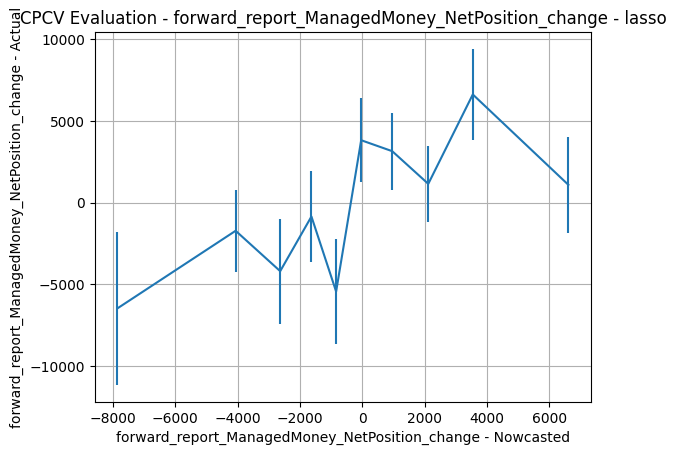

/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=6.32049e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=6.0594e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=5.79916e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=5.89525e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overw

ridge: score=0.1358, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


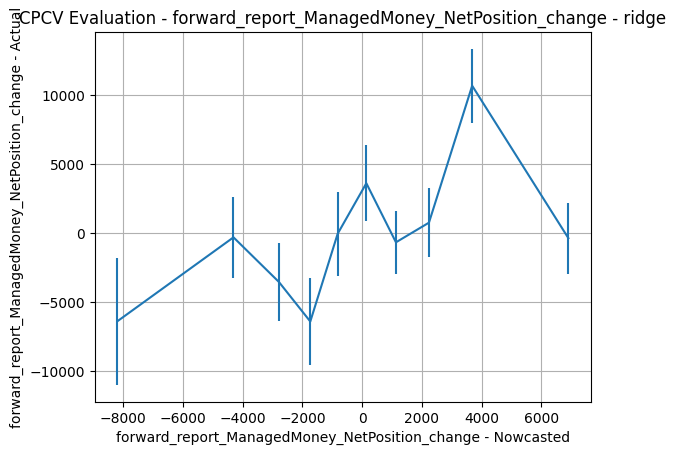

rf: score=0.1403, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 2, 'max_features': 'log2'}
{'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 2, 'max_features': 'log2'}


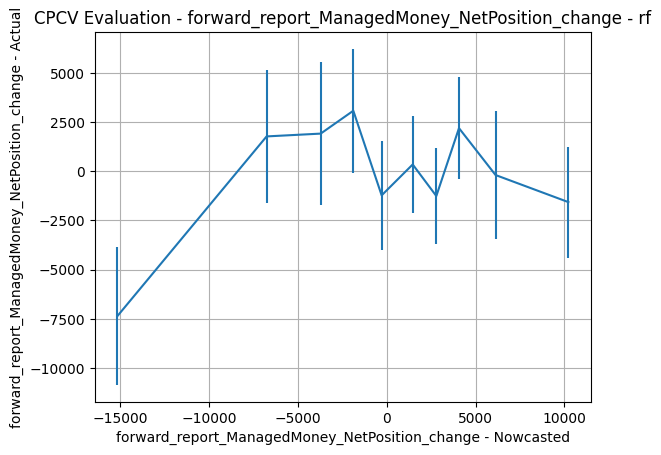

hgbm: score=0.0577, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 10, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 10, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


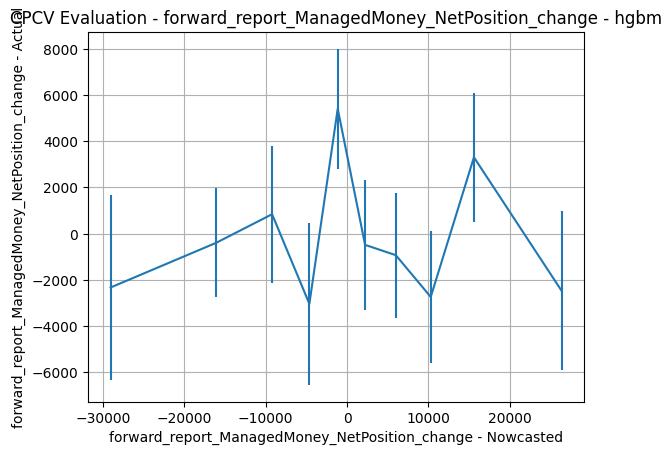

ols: score=0.1358, params={'model': 'ols'}
{}


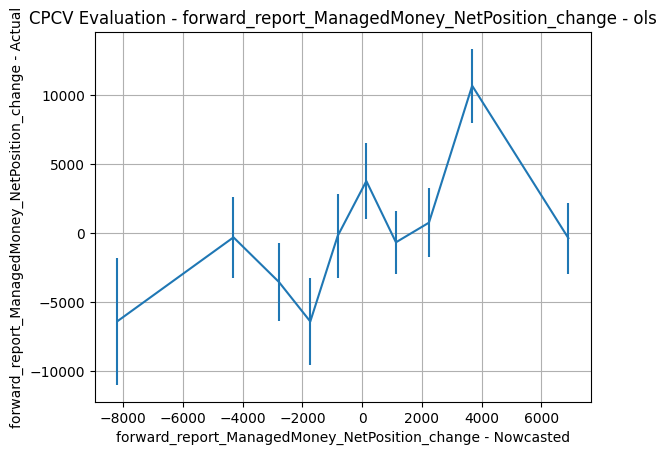

enet: score=-0.0266, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


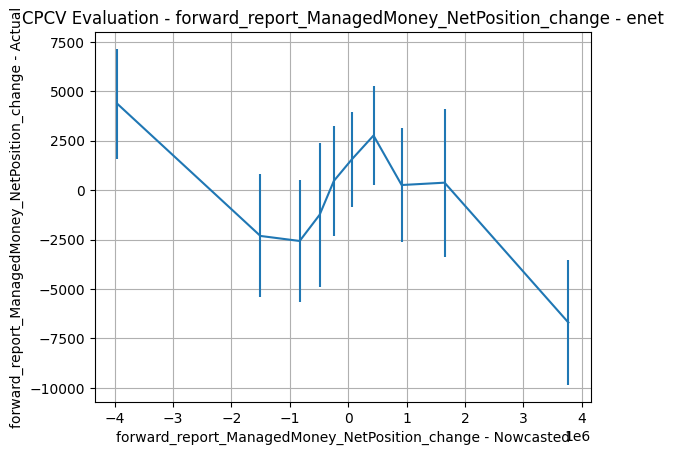

extra: score=0.1250, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 26, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 26, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


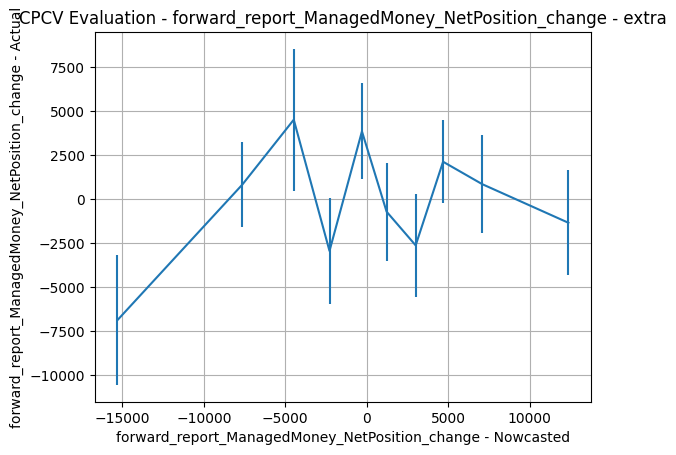

forward_report_ManagedMoney_LongPosition_change
lasso: score=0.0832, params={'model': 'lasso', 'alpha': 9.714586134002047}
{'alpha': 9.714586134002047}


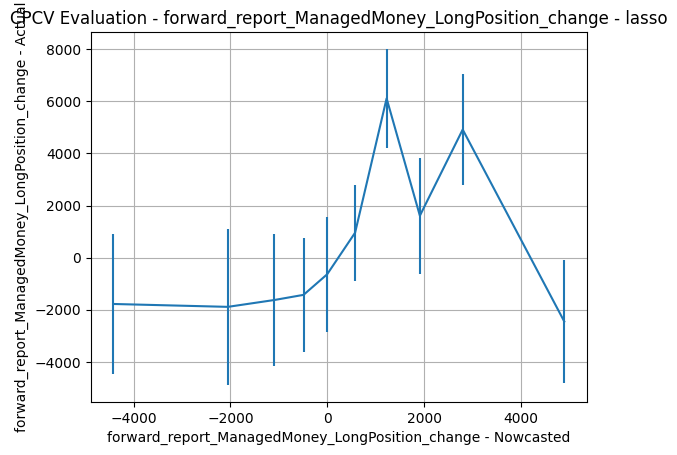

ridge: score=0.0659, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


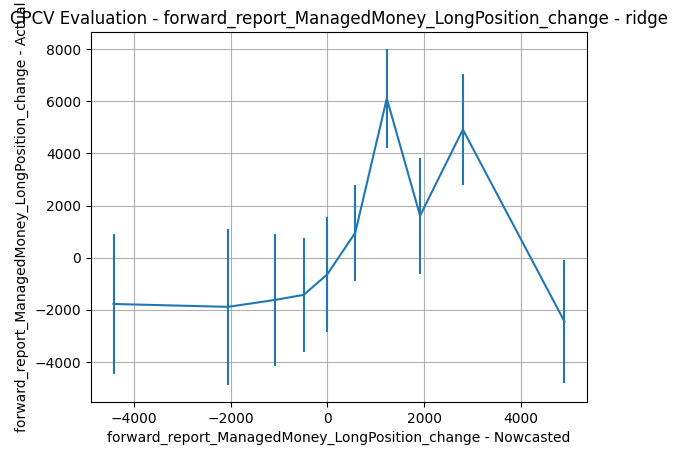

rf: score=0.1067, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'log2'}


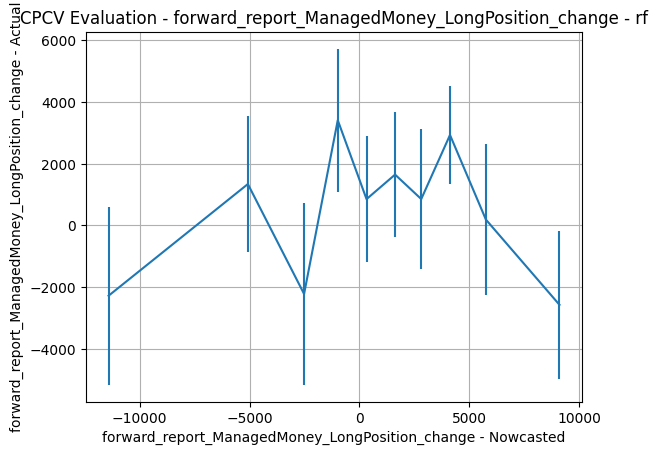

hgbm: score=0.0791, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


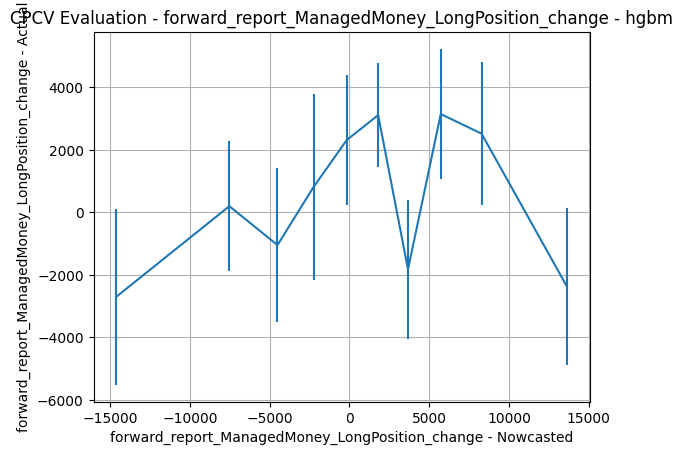

ols: score=0.0835, params={'model': 'ols'}
{}


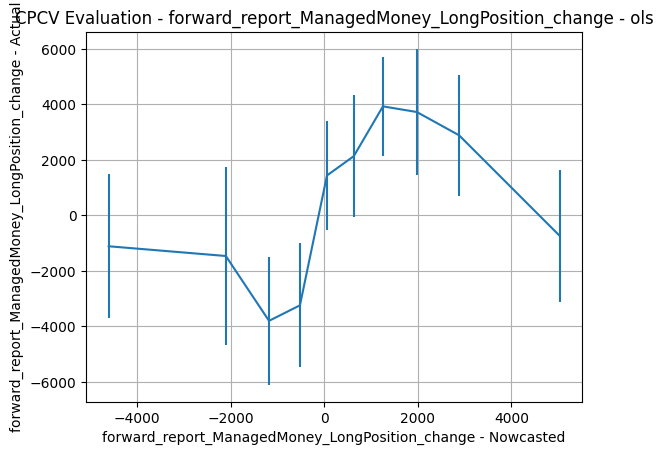

enet: score=-0.0705, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


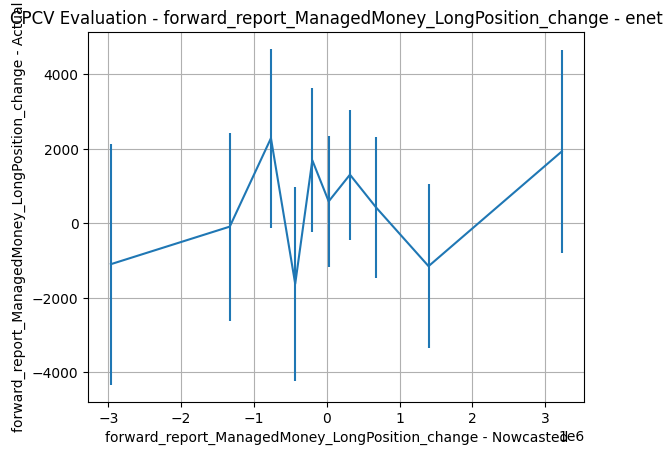

extra: score=0.0327, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}


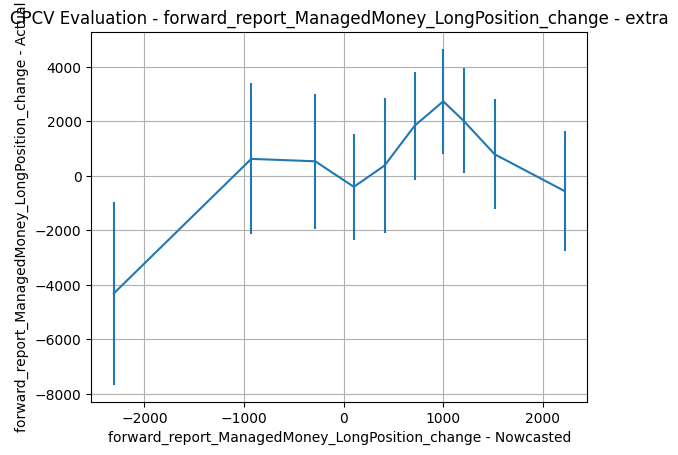

forward_report_ManagedMoney_ShortPosition_change
lasso: score=0.0822, params={'model': 'lasso', 'alpha': 9.714586134002047}
{'alpha': 9.714586134002047}


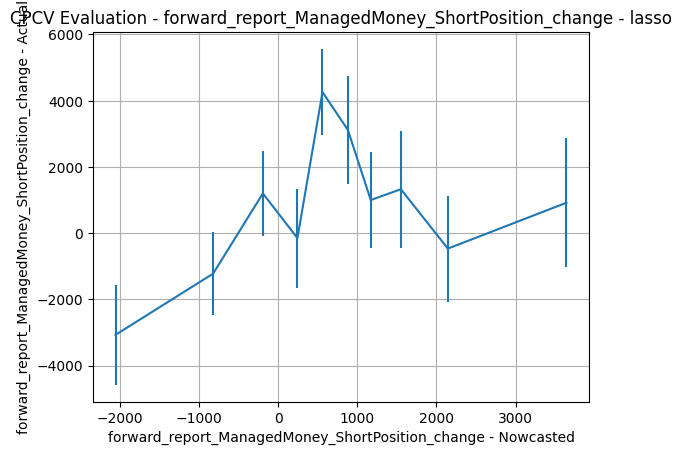

ridge: score=0.0786, params={'model': 'ridge', 'alpha': 442.5093801422389}
{'alpha': 442.5093801422389}


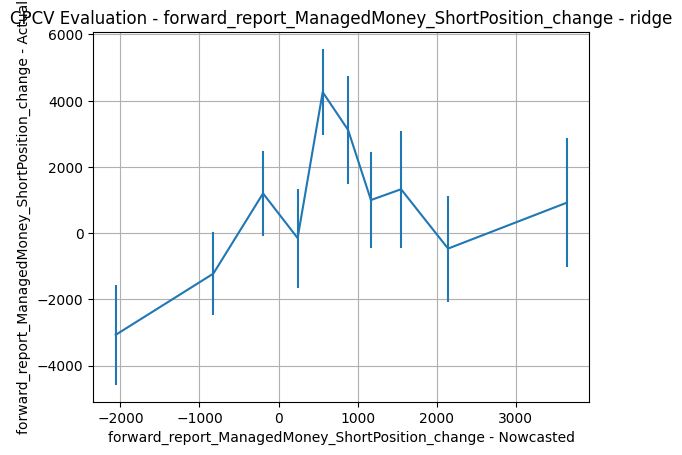

rf: score=0.1261, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}


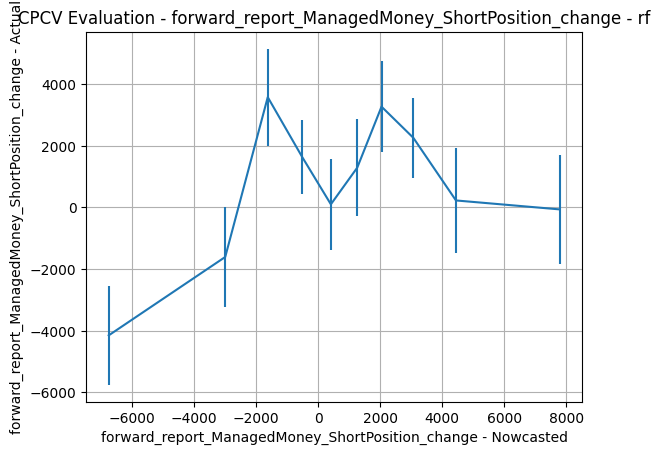

hgbm: score=0.0683, params={'model': 'hgbm', 'learning_rate': 0.20342813052984288, 'max_depth': 13, 'max_iter': 500, 'l2_regularization': 0.6109949517940931, 'max_leaf_nodes': 254}
{'learning_rate': 0.20342813052984288, 'max_depth': 13, 'max_iter': 500, 'l2_regularization': 0.6109949517940931, 'max_leaf_nodes': 254}


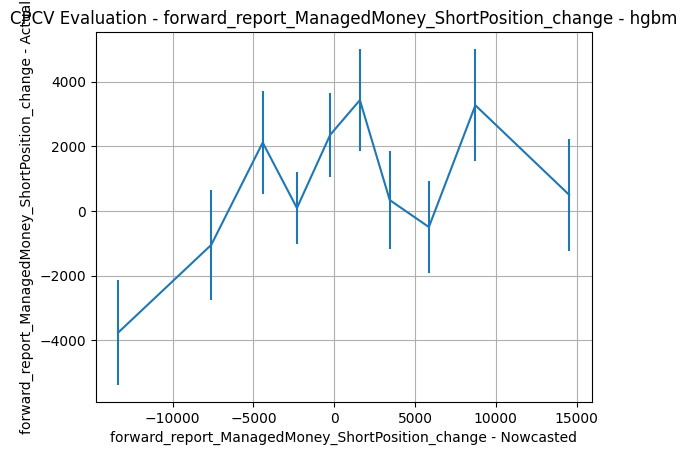

ols: score=0.0828, params={'model': 'ols'}
{}


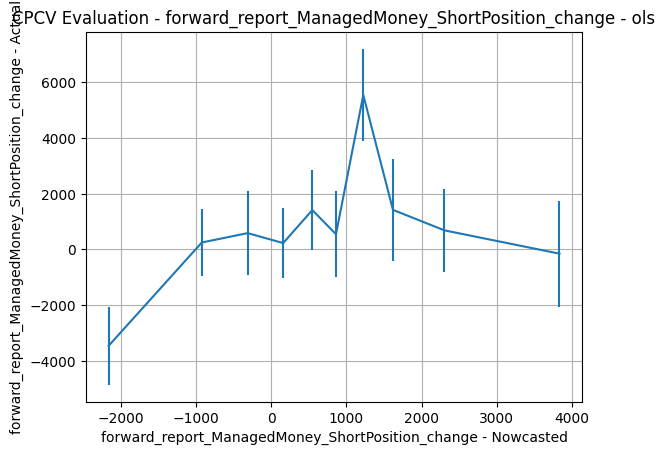

enet: score=-0.0484, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


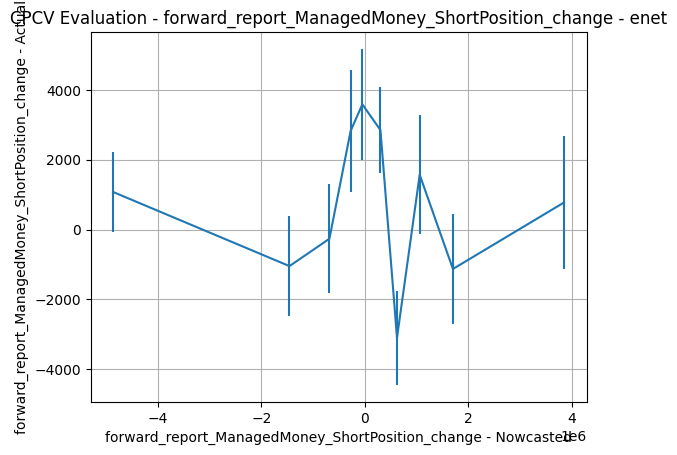

extra: score=0.1009, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'sqrt'}


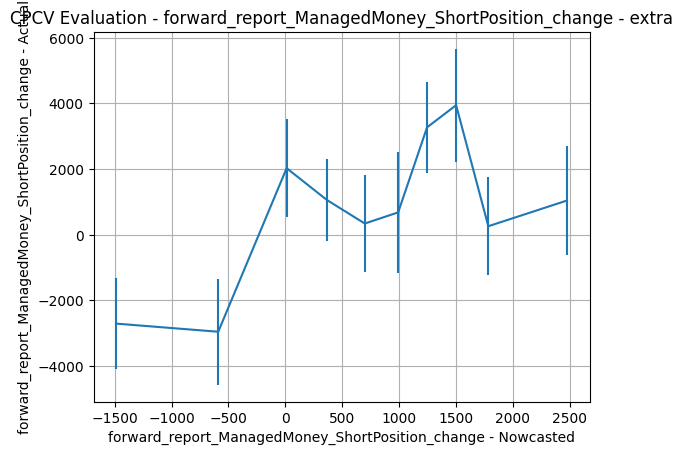

forward_ManagedMoney_NetPosition_to_openinterest_change
lasso: score=-0.0484, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


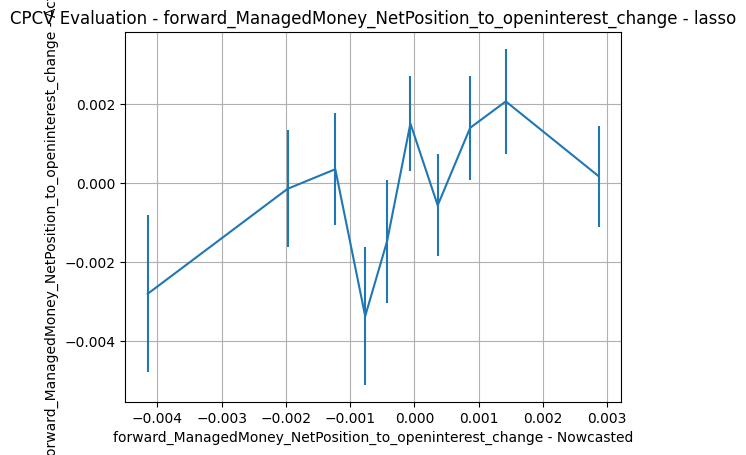

ridge: score=0.1155, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


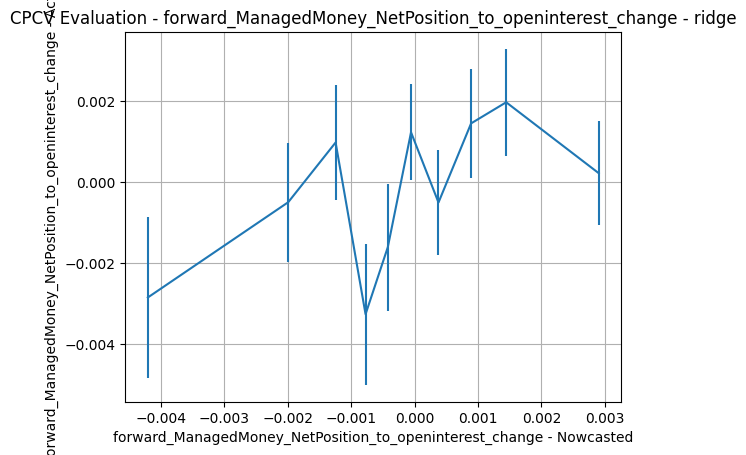

rf: score=0.1243, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}


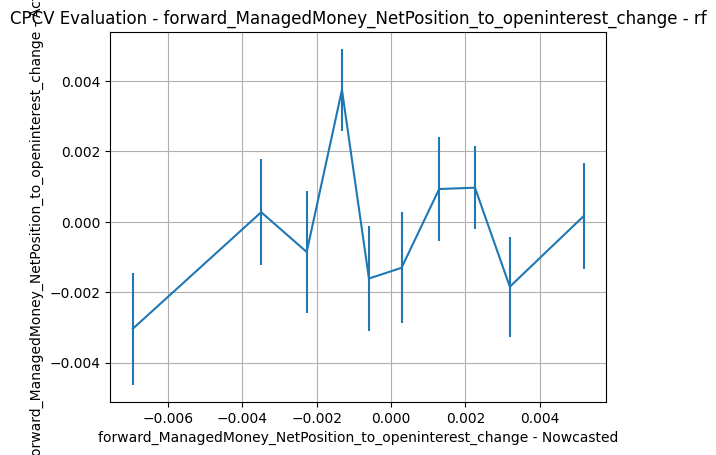

hgbm: score=0.1239, params={'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 11, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}
{'learning_rate': 0.0011976520841200263, 'max_depth': 11, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}


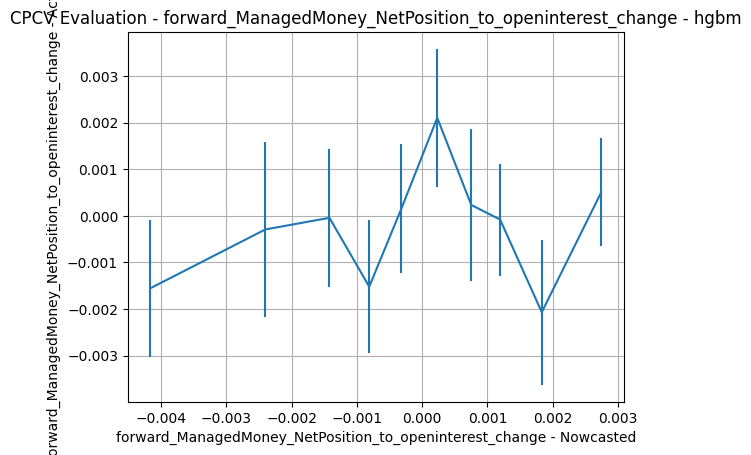

ols: score=0.1204, params={'model': 'ols'}
{}


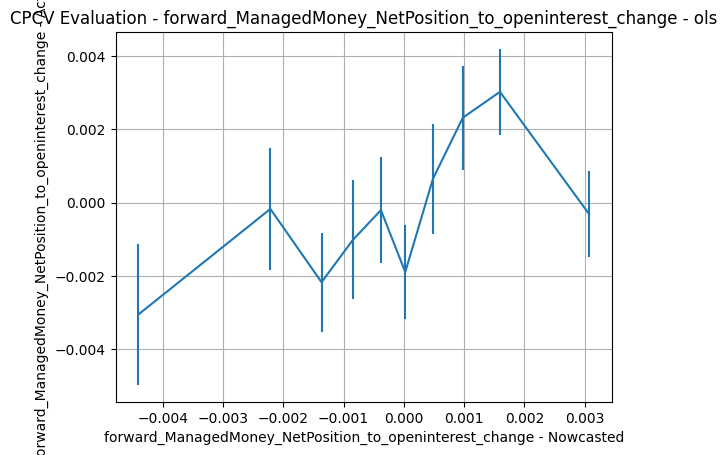

enet: score=-0.0442, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


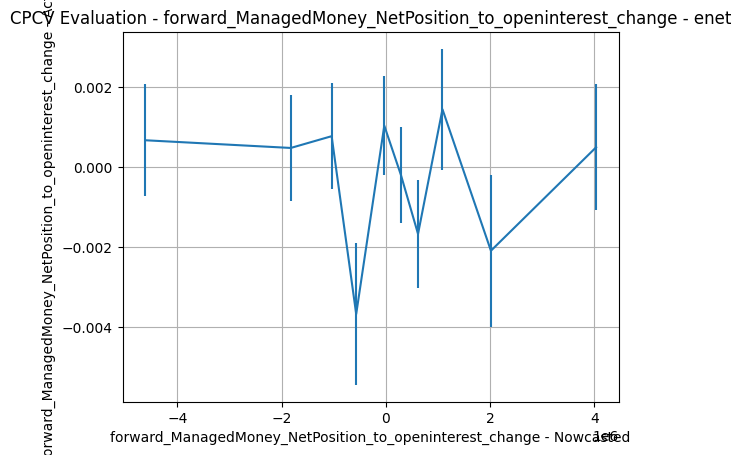

extra: score=0.1131, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 8, 'max_features': 'sqrt'}


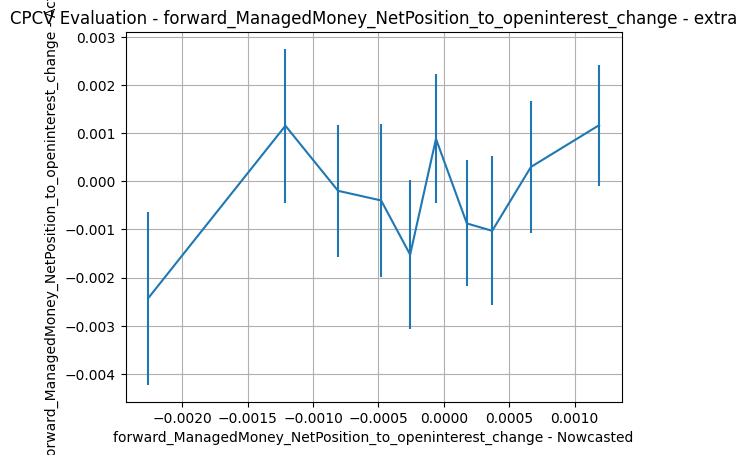

forward_ManagedMoney_LongPosition_to_openinterest_change
lasso: score=-0.0541, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


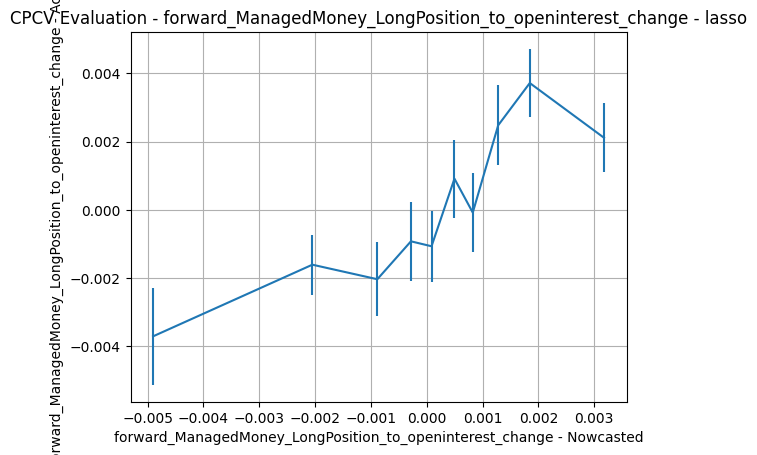

ridge: score=0.2263, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


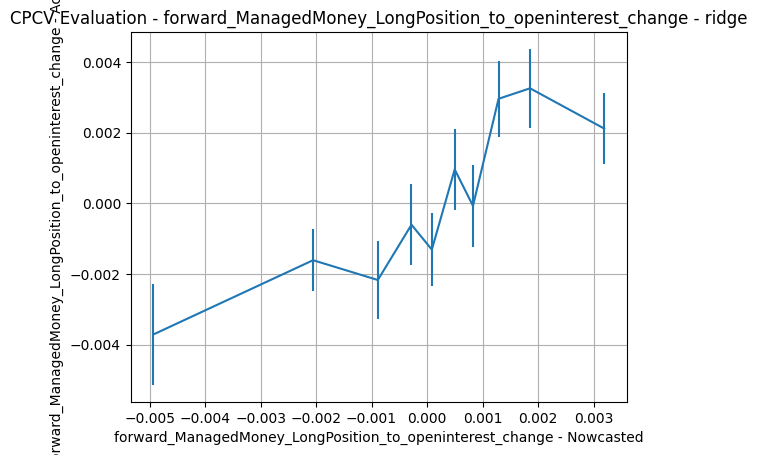

rf: score=0.2460, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}


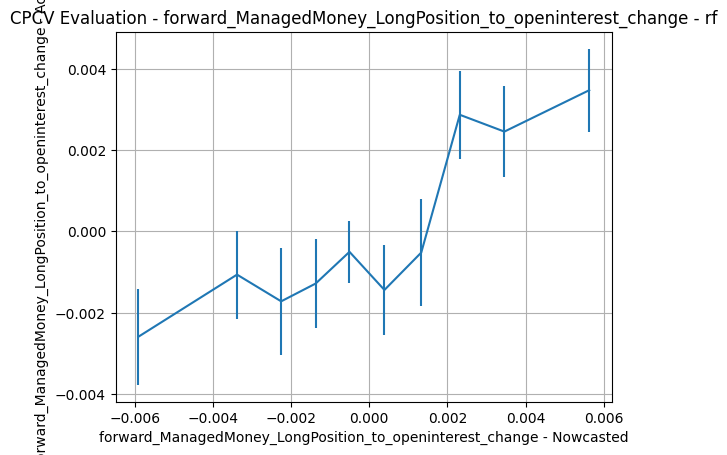

hgbm: score=0.2192, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


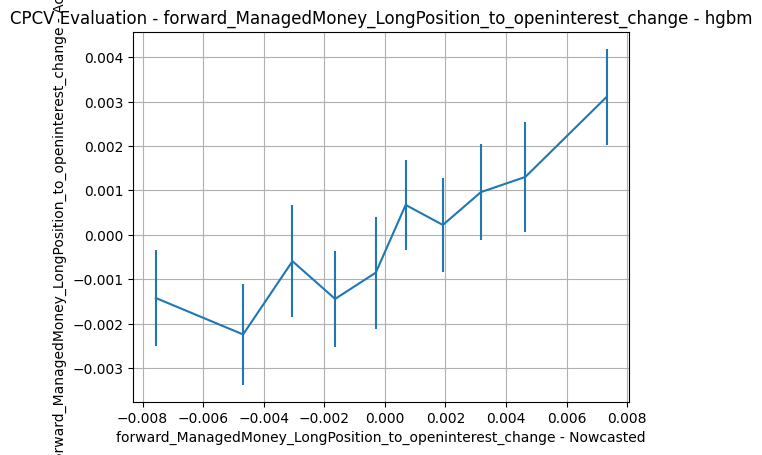

ols: score=0.2316, params={'model': 'ols'}
{}


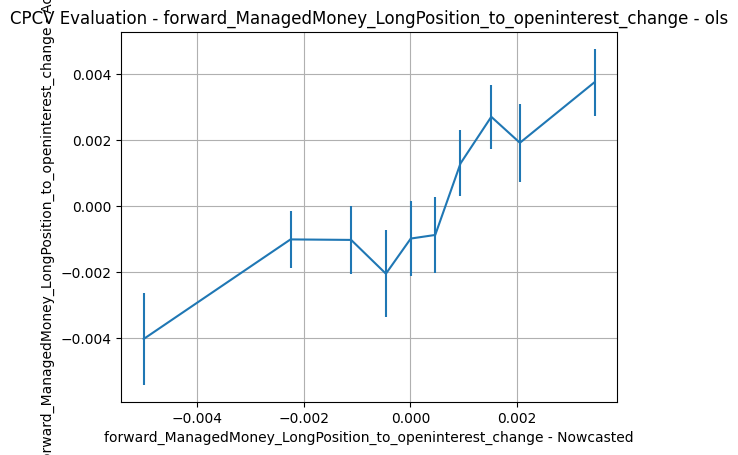

enet: score=-0.0528, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


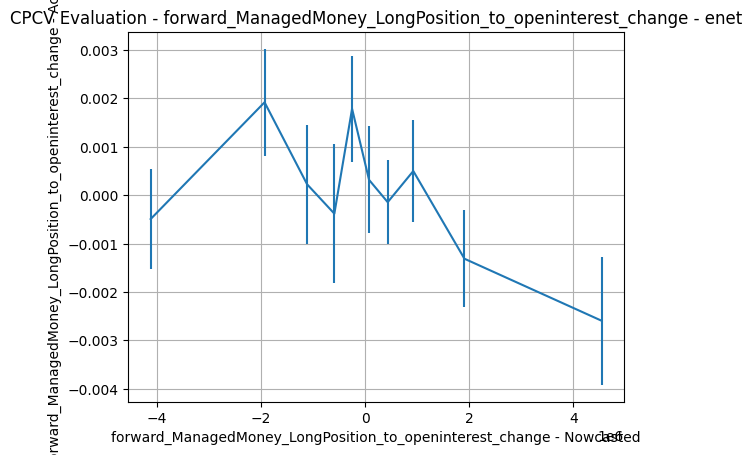

extra: score=0.2523, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}
{'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}


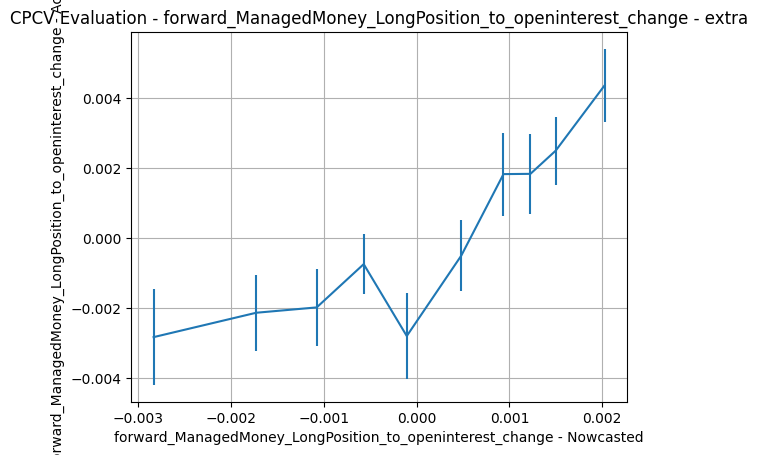

forward_ManagedMoney_ShortPosition_to_openinterest_change
lasso: score=-0.0502, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


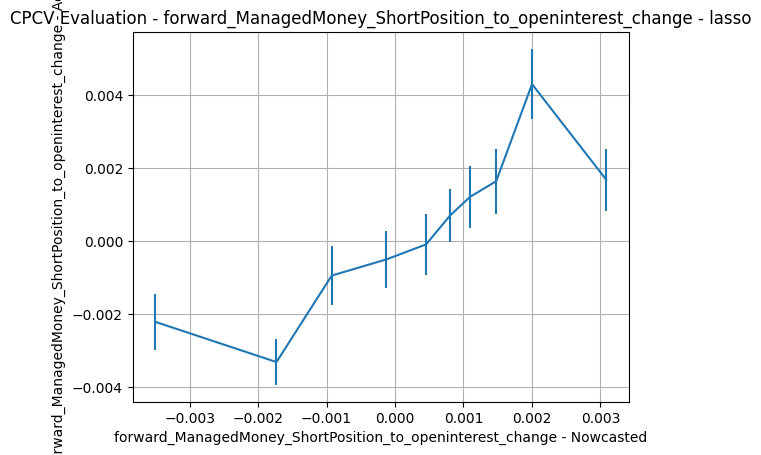

ridge: score=0.2214, params={'model': 'ridge', 'alpha': 509.2222138472398}
{'alpha': 509.2222138472398}


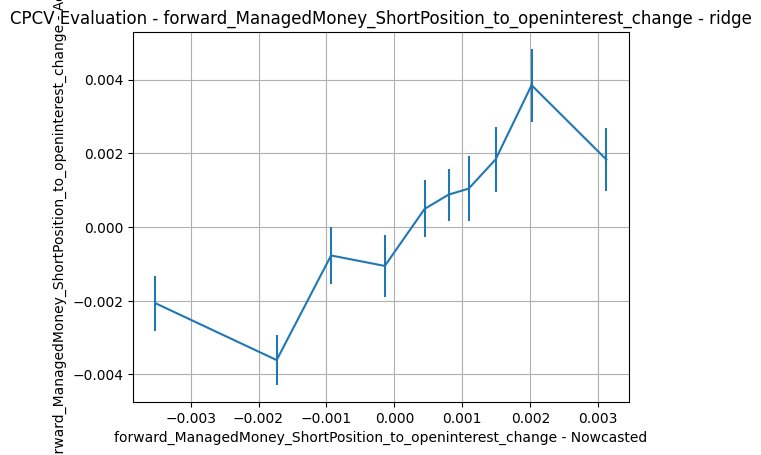

rf: score=0.3034, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}
{'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}


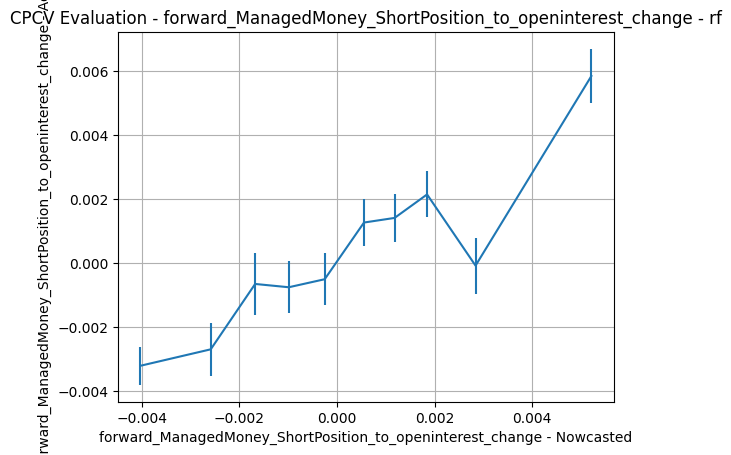

hgbm: score=0.2043, params={'model': 'hgbm', 'learning_rate': 0.16123063330678258, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.556182910382188, 'max_leaf_nodes': 241}
{'learning_rate': 0.16123063330678258, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.556182910382188, 'max_leaf_nodes': 241}


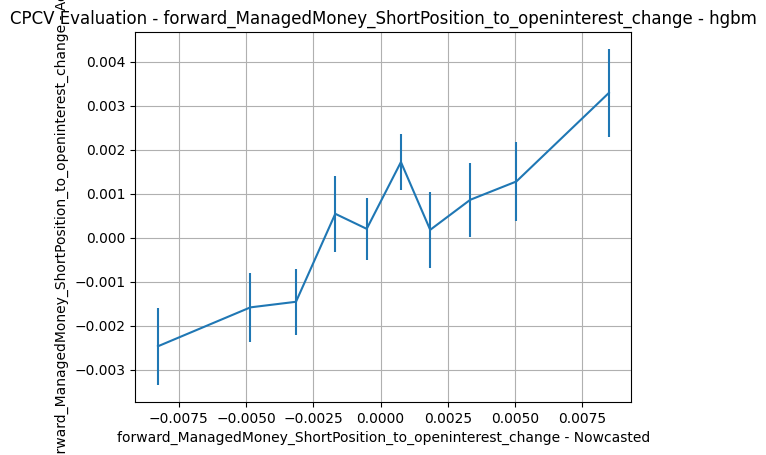

ols: score=0.2333, params={'model': 'ols'}
{}


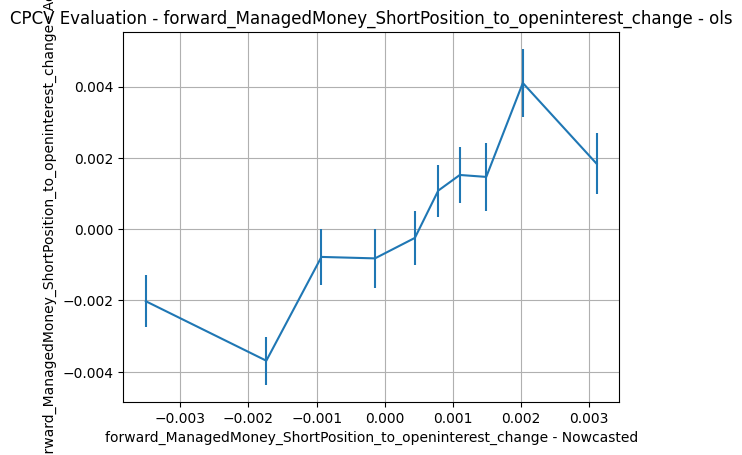

enet: score=-0.0463, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


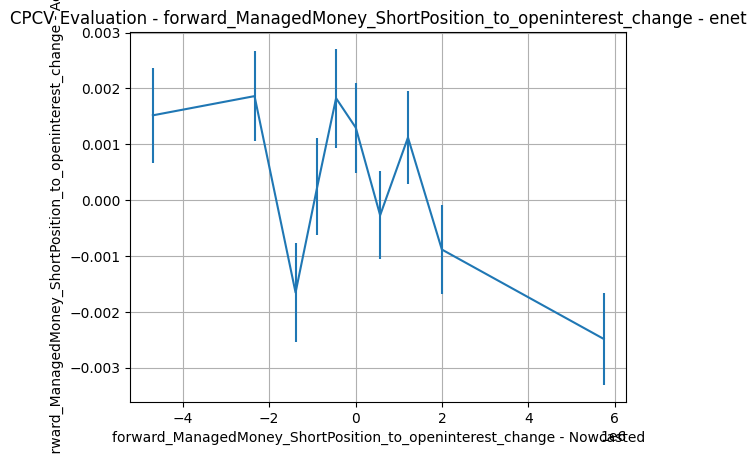

extra: score=0.2952, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


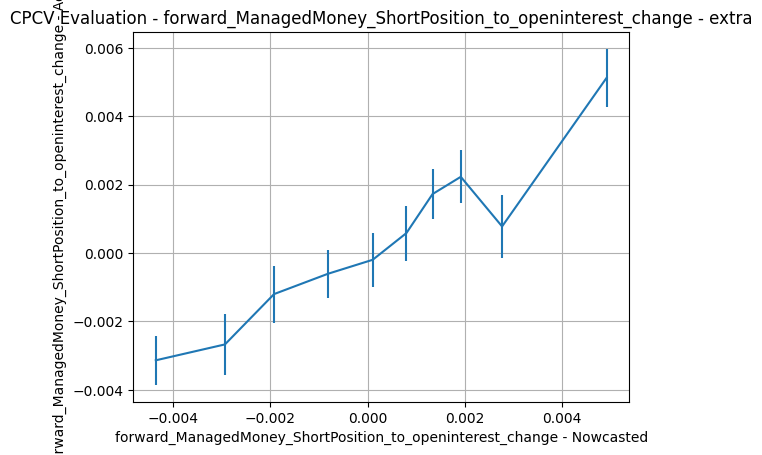

In [36]:
response_performance_map = {}
for response_name , best_model in responses_best_model.items():
    print(response_name)
    best_per_model = responses_best_per_model[response_name]
    response_performance_trail = {}
    for model_name, info in best_per_model.items():
        print(f"{model_name}: score={info['score']:.4f}, params={info['params']}")
        params = copy.deepcopy(info['params'])
        del params['model']
        print(params)
        # estimator = estimators_[model_name.lower()](**params) 

        if model_name == "enet": 
            estimator = SGDRegressor(**params)
        elif model_name == "lasso": 
            estimator = Lasso(**params)
        elif model_name == "ols": 
            estimator = LinearRegression()
        elif model_name == "ridge": 
            estimator = Ridge(**params)
        elif  model_name == "rf": 
            estimator = RandomForestRegressor(**params)
        elif model_name == "extra":
            estimator = ExtraTreesRegressor(**params)
        elif model_name == "hgbm":
            estimator = HistGradientBoostingRegressor(**params)
        

        Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
        Xy.reset_index(drop=True, inplace= True)
        yhat = cpcv_predict( estimator ,
                             Xy[feature_names],
                             Xy[response_name],
                             cv=cv,
                                method = 'predict',
                                n_jobs=10)
        response_performance_trail[model_name] = np.corrcoef(yhat,  Xy[response_name])[0,1]
        _=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
        plt.xlabel(f'{response_name} - Nowcasted')
        plt.ylabel(f'{response_name} - Actual')
        plt.grid()
        plt.title(f'CPCV Evaluation - {response_name} - {model_name}')
        plt.show()
        plt.close()
    response_performance_map[response_name] = response_performance_trail
        
        

In [37]:
pd.DataFrame(response_performance_map).T

,lasso,ridge,rf,hgbm,ols,enet,extra
forward_report_ManagedMoney_NetPosition_change,0.101244,0.104863,0.050494,0.020594,0.104862,-0.062319,0.042643
forward_report_ManagedMoney_LongPosition_change,0.058927,0.058927,0.027949,0.033469,0.059910,-0.008778,0.039994
forward_report_ManagedMoney_ShortPosition_change,0.054545,0.054546,0.091240,0.079346,0.058444,-0.017662,0.097783
forward_ManagedMoney_NetPosition_to_openinterest_change,0.083941,0.084962,0.036871,0.025895,0.090280,-0.014670,0.043451
forward_ManagedMoney_LongPosition_to_openinterest_change,0.172839,0.172775,0.196211,0.156044,0.181155,-0.077547,0.225655
forward_ManagedMoney_ShortPosition_to_openinterest_change,0.233425,0.233764,0.302821,0.204348,0.233259,-0.117380,0.294114


In [38]:
final_selected_model_per_response = dict(pd.DataFrame(response_performance_map).T.idxmax(axis=1))

In [39]:
final_selected_model_and_parameters_per_response = {}
for response_name , best_model_params in responses_best_per_model.items():
    print(response_name)
    best_model_name = final_selected_model_per_response[response_name]
    best_model_params = copy.deepcopy(best_model_params[best_model_name]['params'])
    del best_model_params['model']
    print(best_model_params)
    final_selected_model_and_parameters_per_response[response_name] = {
'model_name' : best_model_name, 
    'params': best_model_params
        
    }
    

forward_report_ManagedMoney_NetPosition_change
{'alpha': 4.473429410462694e-05}
forward_report_ManagedMoney_LongPosition_change
{}
forward_report_ManagedMoney_ShortPosition_change
{'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
forward_ManagedMoney_NetPosition_to_openinterest_change
{}
forward_ManagedMoney_LongPosition_to_openinterest_change
{'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}
forward_ManagedMoney_ShortPosition_to_openinterest_change
{'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}


In [40]:
final_selected_model_and_parameters_per_response

{'forward_report_ManagedMoney_NetPosition_change': {'model_name': 'ridge',
  'params': {'alpha': 4.473429410462694e-05}},
 'forward_report_ManagedMoney_LongPosition_change': {'model_name': 'ols',
  'params': {}},
 'forward_report_ManagedMoney_ShortPosition_change': {'model_name': 'extra',
  'params': {'n_estimators': 200,
   'max_depth': 24,
   'min_samples_leaf': 8,
   'max_features': 'sqrt'}},
 'forward_ManagedMoney_NetPosition_to_openinterest_change': {'model_name': 'ols',
  'params': {}},
 'forward_ManagedMoney_LongPosition_to_openinterest_change': {'model_name': 'extra',
  'params': {'n_estimators': 1200,
   'max_depth': 23,
   'min_samples_leaf': 10,
   'max_features': 'log2'}},
 'forward_ManagedMoney_ShortPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 600,
   'max_depth': 27,
   'min_samples_leaf': 8,
   'max_features': 'log2'}}}

In [41]:
import json
with open("br_cot_mm_forecast_selected_model_by_response.json", "w") as f:
    json.dump(final_selected_model_and_parameters_per_response, f)